In [49]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import os
from glob import glob
from sklearn.metrics import adjusted_mutual_info_score
from tqdm import tqdm
from scipy.spatial.distance import squareform
from igraph import Graph
from igraph import ADJ_MAX
import networkx as nx
import seaborn as sns
from joblib import Parallel, delayed

# 1. Parcellation similarity

1. Parcellations are similar within a single method and a single resolution, across sparsity levels.
2. Data driven parcellations are highly similar to anatomical parcellations. Parcellations obtained using HE method are similar to parcellations obtained from Aver method. Нужна картинка с пересечением анатомического и коннективного атласа.
3. Connectivity parcellations symmetricity are on par with anatomical parcellation symetricity.

In [1]:
# paths = []
# trunc_path = []
# method = []
# resolution = []
# sparsity = []
# for dirpath, dirnames, filenames in os.walk('/data01/ayagoz/sparse_32_concon_HCP/parcellations/ensemble_parcellation'):
#     if ('shuffle' not in dirpath):
#         for filename in filenames:
#             if '.py' not in filename:
#                 p = os.path.join(dirpath, filename)
#                 paths.append(p)
#                 trunc_path.append('/'.join(p.split('/')[6:]))
#                 if 'connectivity_parcellation_level' in p:
#                     method.append('HE')
#                     resolution.append(int(p.split('/')[-3][-1]))
#                     sparsity.append(int(p.split('/')[-2]))
#                 elif 'average_network_partition' in p:
#                     method.append('Aver')
#                     resolution.append(int(p.split('/')[-2][-1]))
#                     sparsity.append(int(p.split('/')[-1].split('_')[-1].split('.')[0]))
#                 elif 'CSPA' in p:
#                     method.append('CSPA')
#                     resolution.append(int(p.split('/')[-2][-1]))
#                     sparsity.append(int(p.split('/')[-1].split('_')[-1].split('.')[0]))

In [2]:
# paths.append('/data01/ayagoz/sparse_32_concon_HCP/parcellations/desikan_aparc_average_1113.npy')
# paths.append('/data01/ayagoz/sparse_32_concon_HCP/parcellations/destrieux_aparc2009_average_1113.npy')
# method.append('desikan_average')
# method.append('destrieux_average')
# resolution.append('none')
# resolution.append('none')
# sparsity.append('none')
# sparsity.append('none')

# path_meta = pd.DataFrame(paths, columns=['path_to_partition'])
# path_meta['method'] = method
# path_meta['resolution'] = resolution
# path_meta['sparsity'] = sparsity

In [3]:
# path_meta.tail()

In [4]:
# path_meta.sort_values(['method', 'resolution', 'sparsity'], inplace=True)

In [279]:
# des = np.load('/data01/ayagoz/sparse_32_concon_HCP/parcellations/desikan_aparc_average_1113.npy')
# idx = des != -1
# all_parc = []
# for p in path_meta['path_to_partition'].values[:-2]:
#     a = np.load(p)
#     b = np.zeros_like(des)-1
#     b[idx] = a
#     all_parc.append(b)
# all_parc.append(np.load('/data01/ayagoz/sparse_32_concon_HCP/parcellations/desikan_aparc_average_1113.npy'))
# all_parc.append(np.load('/data01/ayagoz/sparse_32_concon_HCP/parcellations/destrieux_aparc2009_average_1113.npy'))
# all_parc = np.array(all_parc)

# desik = np.load('/data01/ayagoz/sparse_32_concon_HCP/parcellations/desikan_aparc_average_1113.npy')
# destr = np.load('/data01/ayagoz/sparse_32_concon_HCP/parcellations/destrieux_aparc2009_average_1113.npy')
# idx = desik!=-1

In [5]:
# all_parc = []
# for p in path_meta['path_to_partition'].values[:-2]:
#     a = np.load(p)
#     all_parc.append(a)
# desik = np.load('/data01/ayagoz/sparse_32_concon_HCP/parcellations/desikan_aparc_average_1113.npy')
# destr = np.load('/data01/ayagoz/sparse_32_concon_HCP/parcellations/destrieux_aparc2009_average_1113.npy')
# idx = desik!=-1
# all_parc.append(desik[idx])
# all_parc.append(destr[idx])
# all_parc = np.array(all_parc)

In [6]:
# all_parc.shape

In [7]:
# def compute_ami_parallel(partitions, n_jobs=10):
#     from joblib import Parallel, delayed
#     n = len(partitions)
#     row, col = np.triu_indices(n)
#     amis = Parallel(n_jobs=n_jobs)(delayed(adjusted_mutual_info_score)(partitions[i],
#                                                            partitions[j]) for i,j in tqdm(zip(row, col)))
#     result = np.zeros((n, n))
#     result[row, col]

In [8]:
# result = np.eye(92)
# for i in tqdm(range(92)):
#     for j in range(i, 92):
#         a = adjusted_mutual_info_score(all_parc[i], all_parc[j])
#         result[i, j] = a
#         result[j, i] = a

In [9]:
# cols = []
# for m, r, s in zip(path_meta['method'].values,
#                    path_meta['resolution'].values,
#                    path_meta['sparsity'].values):
#     cols.append(f'{m}_{r}_{s}')

In [10]:
# ami_ensemble = pd.DataFrame(result, columns=cols)

In [11]:
# ami_ensemble.index=cols

In [12]:
# idx = np.array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89])
# plt.imshow(ami_ensemble.iloc[idx, idx])
# plt.colorbar()

In [13]:
# i1 = [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
# i2 = [80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
# a = ami_ensemble.iloc[i1, i1].values
# b = ami_ensemble.iloc[i2, i2].values
# c = ami_ensemble.iloc[i1, i2].values

In [14]:
# for x in [a, b, c]:
#     print(x.mean(), x.std())

In [15]:
# plt.imshow(ami_ensemble)
# plt.colorbar()

In [31]:
# ami_ensemble.iloc[:, -2:].sort_values('destrieux_average_none_none', ascending=False)

In [32]:
# ami_ensemble.iloc[:, -2:].sort_values('destrieux_average_none_none', ascending=False)

In [33]:
# path_meta[path_meta.method=='HE'].iloc[20]['path_to_partition']

In [34]:
# ami_ensemble.iloc[50:60, 50:60]

In [35]:
# plt.imshow(ami_ensemble.iloc[-32:-2, -32:-2])

In [16]:
# ami_ensemble

In [17]:
# ind = [np.arange(i, i+10) for i in range(0, 90, 10)]
# mat = np.zeros((9,9))
# for i, i1 in enumerate(ind):
#     for j, i2 in enumerate(ind):
# #         print(i1, i2)
#         x = np.round(ami_ensemble.iloc[i1, i2].values.mean(), 3)
#         mat[i, j] = x
#         mat[j, i] = x
# cols = ['Aver1', 'Aver2', 'Aver3', 'CSPA1', 'CSPA2', 'CSPA3', 'HE1', 'HE2', 'HE3']
# aver_sim_ensemble = pd.DataFrame(mat, columns=cols)
# aver_sim_ensemble.index = cols

In [21]:
# aver_sim_ensemble

In [18]:
# mat = np.zeros((11,11))
# for i, i1 in enumerate(ind):
#     for j, i2 in enumerate(ind):
# #         print(i1, i2)
#         x = np.round(ami_ensemble.iloc[i1, i2].values.mean(), 2)
# #         print(i, j)
#         mat[i, j] = x
#         mat[j, i] = x
# for a, i in enumerate(ind):
#     mat[9, a] = np.round(ami_ensemble.iloc[90, i].values.mean(), 2)
#     mat[10, a] = np.round(ami_ensemble.iloc[91, i].values.mean(), 2)
#     mat[a, 9] = mat[9, a]
#     mat[a, 10] = mat[10, a]
# mat[9,9] = np.round(ami_ensemble.iloc[90,90], 2)
# mat[10,10] = np.round(ami_ensemble.iloc[91,91], 2)
# mat[9, 10] = np.round(ami_ensemble.iloc[90, 91], 2)
# mat[10, 9] = np.round(ami_ensemble.iloc[91, 90], 2)

# mat2 = mat[[6,7,8,0,1,2,3,4,5,9,10], :][:, [6,7,8,0,1,2,3,4,5,9,10]]
# cols = ['Aver1', 'Aver2', 'Aver3', 'CSPA1', 'CSPA2', 'CSPA3', 'HE1', 'HE2', 'HE3', 'Desikan', 'Destrieux']
# aver_sim_ensemble = pd.DataFrame(mat, columns=cols)
# aver_sim_ensemble.index = cols
# aver_sim_ensemble

In [20]:
# cols = ['$HE_1$', '$HE_2$', '$HE_3$','$Aver_1$', '$Aver_2$', '$Aver_3$', '$CSPA_1$', '$CSPA_2$', '$CSPA_3$', '$Desikan$', '$Destrieux$']
# aver_sim_ensemble = pd.DataFrame(np.round(mat2*100).astype(int), columns=cols)
# # aver_sim_ensemble = pd.DataFrame(mat2, columns=cols)
# aver_sim_ensemble.index = cols
# aver_sim_ensemble

In [19]:
# import matplotlib.pyplot as plt
# from matplotlib.ticker import FuncFormatter
# import seaborn as sns
# sns.set()
# font = {'family' : 'monospace',
#         'size'   : 20}

# plt.rc('font', **font)
# # Draw a heatmap with the numeric values in each cell
# f, ax = plt.subplots(figsize=(8,8))

# # fmt = lambda x,pos: '{:.0%}'.format(x)
# # sns.heatmap(uniform_data, annot=true, fmt='.0%',
# #             cbar_kws={'format': funcformatter(fmt)})



# sns.heatmap(aver_sim_ensemble,
#             annot=True,
#             linewidths=.5,
#             fmt='',
#             ax=ax,
#             cmap='Blues',
#             cbar=False)
# ax.tick_params(axis='x', rotation=90, labelsize=16)
# ax.tick_params(axis='y', rotation=0, labelsize=16)
# f.tight_layout()
# f.savefig('/home/kurmukov/parcellation_similarity.png', dpi=300, transparent=True)
# # plt.colorbar()

# Similarity Sparsity

In [308]:
sim = ami_ensemble[['HE_3_10','HE_3_20','HE_3_30','HE_3_40','HE_3_50',
              'HE_3_60','HE_3_70','HE_3_80','HE_3_90','HE_3_100']].iloc[80:90]

In [318]:
a = sim.values

In [319]:
a = np.round(a, 2)

In [326]:
mask = np.zeros_like(a, dtype=np.bool)
mask[np.triu_indices_from(mask, k=1)] = True

cmap = sns.diverging_palette(0, 1, as_cmap=True)

In [337]:
# sns.heatmap(a, mask = mask, center=0,
#             square=True, linewidths=.5)

(0, 1)

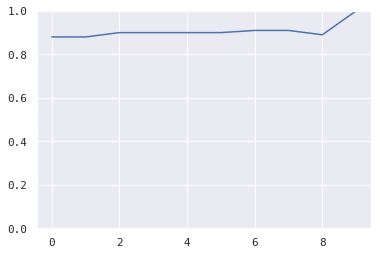

In [341]:
plt.plot(a[-1, :])
plt.ylim(0,1)

# Similarity to Desikan

In [22]:
# he3_10 = np.load('/data01/ayagoz/sparse_32_concon_HCP/parcellations/ensemble_parcellation/connectivity_parcellation_level3/10/ensemble_3_10.npy')
# desik = np.load('/data01/ayagoz/sparse_32_concon_HCP/parcellations/desikan_aparc_average_1113.npy')
# destr = np.load('/data01/ayagoz/sparse_32_concon_HCP/parcellations/destrieux_aparc2009_average_1113.npy')
# desik = desik[desik!=-1]

In [23]:
# np.unique(destr, return_counts=True)

In [24]:
# adjusted_mutual_info_score(he3_10, desik)

In [25]:
# from sklearn.metrics.cluster import contingency_matrix

In [93]:
# m = contingency_matrix(he3_10, desik)

In [27]:
# m.sum(axis=0)

In [26]:
# region_id = []
# percentage = []
# region_size = []
# for i,row in enumerate(m.T):
# #     print(i, row.sum(), max(row), int(100*np.round(max(row)/row.sum(), 2)))
#     region_id.append(i)
#     percentage.append(int(100*np.round(max(row)/row.sum(), 2)))
#     region_size.append(row.sum())
    
# region_id = np.array(region_id)
# percentage = np.array(percentage)
# region_size = np.array(region_size)

In [28]:
# idx = np.argsort(percentage)[::-1]

In [29]:
# for a,b,c in zip(percentage[idx], region_id[idx], region_size[idx]):
#     print(a,b,c)

In [30]:
# for i in range(1,35):
#     print(i, i+34)

# Classification

In [51]:
# import pandas as pd
# import numpy as np
# from glob import glob

In [52]:
# results = glob('/home/kurmukov/connective_parcellation/concon_processing/model_eval_results/*.csv')

# df = pd.read_csv(results[0], index_col=0)
# for f in results[1:]:
#     if 'cv' not in f:
#         temp = pd.read_csv(f, index_col=0)
#         df = df.append(temp, ignore_index=True)

# auc_test = df.test_mean
# auc_mean = df.cv_mean
# n_features = df.non_zero

In [53]:
# df.sort_values('test_mean', ascending=False).query('test_mean > 0.8 and non_zero < 500')

In [54]:
# df.sort_values('test_mean',
#                ascending=False).groupby(['ensemble',
#                                          'level',])['n_features','non_zero','test_mean'].agg(['mean', 'std'])

In [55]:
# df.sort_values('test_mean',
#                ascending=False).groupby(['ensemble',
#                                          'level',])['test_mean'].agg(['mean', 'std'])

In [56]:
# plt.scatter(n_features, auc_test);

In [57]:
# plt.scatter(n_features, auc_test);

In [58]:
# plt.scatter(auc_test, auc_mean)

In [59]:
# df.sort_values('test_mean', ascending=False).head()

In [60]:
# df.query('test_mean > 0.8 and non_zero < 600').sort_values('cv_mean', ascending=False)

In [61]:
# df.query('test_mean > 0.8 and non_zero < 600').sort_values('cv_mean', ascending=False).sparsity.value_counts()

# KL l2 distance

In [17]:
import os

In [18]:
def l2_distance(CC_adjacency, parcellation):
    
    '''
    Слишком сильно пенализируется на площадь 1 зоны
    парцеляции с малым числом крупных зон получаются с маленьким расстоянием
    
    
    compute total variance of parcellation model against ConCon model
    CC_adjacency[i,j] is a RV x_ij
    CC_adj[i,j] is a RV mean according to given parcellation
    
    
    '''
    n_vertices = CC_adjacency.shape[0]
    # squeeze_matrix return downsampled ConCon matrix according to parcellation
    # and apropriate transformation matrix of size n_ConCon_vertices x n_downsample_vertices
    adj, transform = squeeze_matrix(CC_adjacency, parcellation, return_transform=True, fill_diag_zero=False)
    
    # restore ConCon resolution matrix. mean(x)
    t_w = transform / transform.sum(axis=0) # in order to get mean 
    CC_adj_mean = t_w.dot(adj).dot(t_w.T)
    
#     print(CC_adj_mean)
    
    i,j = np.triu_indices(n_vertices, k=1)

    ##
    # compute x_i - mean(x)
    ##
    triu_adj = CC_adjacency[i,j]
    triu_adj_mean = CC_adj_mean[i,j]
    diff = triu_adj - triu_adj_mean
    
#     print(triu_adj_mean)
    
    ##
    # compute normalizing factor for variance 1 / (n-1), where n ~ number of triangles in ROI
    ##
    variance_norm_coef = np.ones((n_vertices, n_vertices))
    t_var = transform / (transform.sum(axis=0)-1)
    t_var_sq = t_var.dot(t_var.T)
    variance_norm_coef = t_var_sq.dot(variance_norm_coef).dot(t_var_sq)
    triu_variance = np.sqrt(variance_norm_coef[i,j])
    
    ##
    # compute 1/(n-1) (x_i - E(x))**2
    ##
    diff = np.multiply(diff, triu_variance)  
    l2_average = diff.dot(diff.T)
    
    return l2_average[0][0]

In [60]:
import numpy as np
from scipy.sparse import coo_matrix

def squeeze_matrix(matrix, labels, return_transform=True, fill_diag_zero=True):

    input_size = matrix.shape[0]
    output_size = np.unique(labels).shape[0]
    
    d = dict(zip(np.unique(labels), np.arange(output_size)))
    _labels = list(map(lambda x: d[x], labels))
    transform = np.zeros((input_size, output_size))
    
    for row, col in enumerate(_labels):
        transform[row, col] = 1
    
    squeezed = transform.T.dot(matrix.dot(transform))
    squeezed = (squeezed + squeezed.T)/2
    
    if fill_diag_zero:
        np.fill_diagonal(squeezed, 0)
    
    if return_transform:
        return np.array(squeezed), transform
    
    return np.array(squeezed)



def KL_distance(CC_adjacency, parcellation):
  
    n_vertices = CC_adjacency.shape[0]
    # squeeze_matrix return downsampled ConCon matrix according to parcellation
    # and apropriate transformation matrix of size n_ConCon_vertices x n_downsample_vertices
    adj, transform = squeeze_matrix(CC_adjacency, parcellation, return_transform=True, fill_diag_zero=False)
    
    # restore ConCon resolution matrix. mean(x)
    t_w = transform / transform.sum(axis=0) # in order to get mean 
    CC_adj_mean = t_w.dot(adj).dot(t_w.T)
    
    i,j = np.triu_indices(n_vertices, k=1)

    ##
    # compute x_i - mean(x)
    ##
    triu_adj = np.array(CC_adjacency[i,j]).reshape(-1)
    triu_adj_mean = np.array(CC_adj_mean[i,j]).reshape(-1)
    non_zero = np.nonzero(triu_adj)[0]
    triu_adj = triu_adj[non_zero]
    triu_adj_mean = triu_adj_mean[non_zero]
    
    
    return (np.multiply(triu_adj, np.log(triu_adj/triu_adj_mean))).mean()#, non_zero


def load_concon(path, labels_to_drop=None):
    '''
    Load ConCon ajancency matrix
    
    Parameters
    -------
    
    path - str,
     path to concon *.npz file
     
    labels_to_drop - ndarray,
     default None, drops rows/columns which
     corresponds to label "-1" (corpus collosum, cerebellum)
     
    Return
    -------
    
    adjacency matrix
    '''

    data = np.load(path)
    sparse_data = coo_matrix((data['data'], (data['row'], data['col'])))
    adj = sparse_data.todense()
    adjacency_balanced = (adj + adj.T) / 2
    np.fill_diagonal(adjacency_balanced, 0)

    if labels_to_drop is not None:
        mask = labels_to_drop != -1
        adjacency_balanced = adjacency_balanced[mask, :][:, mask]
    return adjacency_balanced

def get_all_parc():
    paths = []
    trunc_path = []
    method = []
    resolution = []
    sparsity = []
    for dirpath, dirnames, filenames in os.walk('/data01/ayagoz/sparse_32_concon_HCP/parcellations/ensemble_parcellation'):
        if ('shuffle' not in dirpath):
            for filename in filenames:
                if '.py' not in filename:
                    p = os.path.join(dirpath, filename)
                    paths.append(p)
                    trunc_path.append('/'.join(p.split('/')[6:]))
                    if 'connectivity_parcellation_level' in p:
                        method.append('HE')
                        resolution.append(int(p.split('/')[-3][-1]))
                        sparsity.append(int(p.split('/')[-2]))
                    elif 'average_network_partition' in p:
                        method.append('Aver')
                        resolution.append(int(p.split('/')[-2][-1]))
                        sparsity.append(int(p.split('/')[-1].split('_')[-1].split('.')[0]))
                    elif 'CSPA' in p:
                        method.append('CSPA')
                        resolution.append(int(p.split('/')[-2][-1]))
                        sparsity.append(int(p.split('/')[-1].split('_')[-1].split('.')[0]))
    paths.append('/data01/ayagoz/sparse_32_concon_HCP/parcellations/desikan_aparc_average_1113.npy')
    paths.append('/data01/ayagoz/sparse_32_concon_HCP/parcellations/destrieux_aparc2009_average_1113.npy')
    method.append('desikan_average')
    method.append('destrieux_average')
    resolution.append('none')
    resolution.append('none')
    sparsity.append('none')
    sparsity.append('none')

    path_meta = pd.DataFrame(paths, columns=['path_to_partition'])
    path_meta['method'] = method
    path_meta['resolution'] = resolution
    path_meta['sparsity'] = sparsity
    path_meta['key'] = path_meta.apply(lambda x: f"{x['method']}_{x['resolution']}_{x['sparsity']}", axis=1)
    return path_meta

In [20]:
p = get_all_parc()

In [36]:
p.to_csv('all_parcellation_paths.csv')

In [70]:
df = pd.read_csv('all_parcellation_paths.csv', index_col=0).query('sparsity=="10" or sparsity == "none"')

In [97]:
!pwd

/home/kurmukov/connective_parcellation


In [79]:
row.path_to_partition

'/data01/ayagoz/sparse_32_concon_HCP/parcellations/ensemble_parcellation/connectivity_parcellation_level1/10/ensemble_1_10.npy'

In [99]:
pd.read_csv('/home/kurmukov/connective_parcellation/concon_processing/kl_results/180836.csv')

,Unnamed: 0,HE_1_10,HE_2_10,HE_3_10,CSPA_1_10,CSPA_2_10,CSPA_3_10,Aver_1_10,Aver_2_10,Aver_3_10,desikan_average_none_none,destrieux_average_none_none
0,0,14.153794,10.405792,8.365284,15.290117,14.223592,14.149306,14.357965,10.701923,8.812135,10.307085,8.227469


In [95]:
x = {}
for row in df.itertuples():
    x[row.key] = [1]#np.load(row.path_to_partition)
#     print(row.key)
#     print(row.path_to_partition)
#     print('-----')

In [93]:
x

{'HE_1_10': [1, 2, 3],
 'HE_2_10': [1, 2, 3],
 'HE_3_10': [1, 2, 3],
 'CSPA_1_10': [1, 2, 3],
 'CSPA_2_10': [1, 2, 3],
 'CSPA_3_10': [1, 2, 3],
 'Aver_1_10': [1, 2, 3],
 'Aver_2_10': [1, 2, 3],
 'Aver_3_10': [1, 2, 3],
 'desikan_average_none_none': [1, 2, 3],
 'destrieux_average_none_none': [1, 2, 3]}

In [96]:
pd.DataFrame(x)

,HE_1_10,HE_2_10,HE_3_10,CSPA_1_10,CSPA_2_10,CSPA_3_10,Aver_1_10,Aver_2_10,Aver_3_10,desikan_average_none_none,destrieux_average_none_none
0,1,1,1,1,1,1,1,1,1,1,1


In [61]:
desik = np.load('/data01/ayagoz/sparse_32_concon_HCP/parcellations/desikan_aparc_average_1113.npy')
cc = load_concon('/data01/ayagoz/sparse_32_concon_HCP/connectomes/ConCon_resolution/10/236130.npz',
                                 labels_to_drop=desik)



In [62]:
he3_10 = np.load('/data01/ayagoz/sparse_32_concon_HCP/parcellations/ensemble_parcellation/connectivity_parcellation_level3/10/ensemble_3_10.npy')
kl_d = KL_distance(cc, he3_10)
kl_d

/home/kurmukov/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in true_divide
/home/kurmukov/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in true_divide
/home/kurmukov/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in log
/home/kurmukov/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in multiply


nan

In [35]:
# hours
92 * 426 * 16 / 60 / 60 / 25

6.967466666666667

In [189]:
kl_d2

8.958244269834566

In [63]:
destr = np.load('/data01/ayagoz/sparse_32_concon_HCP/parcellations/destrieux_aparc2009_average_1113.npy')
kl_d3 = KL_distance(cc, destr[desik!=-1])

/home/kurmukov/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in true_divide
/home/kurmukov/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in true_divide
/home/kurmukov/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in log
/home/kurmukov/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in multiply


In [64]:
kl_d3

nan

In [44]:
aver3_10 = np.load(f'/data01/ayagoz/sparse_32_concon_HCP/parcellations/ensemble_parcellation/average_network_partition/level2/aver_level2_10.npy')
kl_d4 = KL_distance(cc, aver3_10)
kl_d4

0.8709558921860864

In [45]:
aver3_10 = np.load(f'/data01/ayagoz/sparse_32_concon_HCP/parcellations/ensemble_parcellation/average_network_partition/level2/aver_level2_100.npy')
kl_d4 = KL_distance(cc, aver3_10)
kl_d4

0.8670569518054957

In [26]:
np.unique(he3_10)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91])

# Сравнение графовых характеристик для индивидуальных графов

### средняя длина пути, коэффициент кластеризации, распределение степеней

In [31]:
# def compute_APL(adj2, mode=None):
#     adj = adj2.copy()
#     if mode == 'normed':
#         adj = adj / adj.sum()
#     elif mode == 'binarized':
#         adj = np.where(adj>0, 1, 0)
#     elif mode == 'inversed':
#         i, j = np.where(adj>0)
#         adj[i, j] = 1/adj[i, j]
#     elif mode == 'inversed_normed':
#         i, j = np.where(adj>0)
#         adj[i, j] = 1/adj[i, j]
#         adj = adj / adj.sum()
#     elif mode == 'normed_inversed':
#         adj = adj / adj.sum()
#     elif mode == 'log_normed':
#         adj = np.log1p(adj)
#         r, c = np.where(adj != 0)
#         adj[r, c] = 1 / adj[r, c]
#         adj = adj / adj.sum()
    
    
#     g = nx.from_numpy_array(adj)
#     comp = list(nx.components.connected_component_subgraphs(g))
#     largest = np.argmax([len(c) for c in comp]) 
#     return nx.average_shortest_path_length(comp[largest], weight='weight')

# def compute_shortest_path_length(adj2, mode=None):
#     adj = adj2.copy()
#     if mode == 'normed':
#         adj = adj / adj.sum()
#     elif mode == 'binarized':
#         adj = np.where(adj>0, 1, 0)
#     elif mode == 'inversed':
#         i, j = np.where(adj>0)
#         adj[i, j] = 1/adj[i, j]
#     elif mode == 'inversed_normed':
#         i, j = np.where(adj>0)
#         adj[i, j] = 1/adj[i, j]
#         adj = adj / adj.sum()
#     elif mode == 'normed_inversed':
#         adj = adj / adj.sum()
#     elif mode == 'log_normed':
#         adj = np.log1p(adj)
#         r, c = np.where(adj != 0)
#         adj[r, c] = 1 / adj[r, c]
#         adj = adj / adj.sum()
    
    
#     g = nx.from_numpy_array(adj)
#     comp = list(nx.components.connected_component_subgraphs(g))
#     largest = np.argmax([len(c) for c in comp]) 
#     spl = []
#     for elem in list(nx.shortest_path_length(comp[largest], weight='weight')):
#         spl.append(np.mean(list(elem[1].values())))
#     return spl

    

# def compute_clustering(adj2, mode=None):
#     adj = adj2.copy()
#     if mode == 'normed':
#         adj = adj / adj.sum()
#     elif mode == 'binarized':
#         adj = np.where(adj>0, 1, 0)
#     elif mode == 'inversed':
#         i, j = np.where(adj>0)
#         adj[i, j] = 1/adj[i, j]
#     elif mode == 'normed_inversed':
#         i, j = np.where(adj>0)
#         adj[i, j] = 1/adj[i, j]
#         adj = adj / adj.sum()
#     elif mode == 'log_normed':
#         adj = np.log1p(adj)
#         r, c = np.where(adj != 0)
#         adj[r, c] = 1 / adj[r, c]
#         adj = adj / adj.sum()
    
#     g = nx.from_numpy_array(adj)
#     comp = list(nx.components.connected_component_subgraphs(g))
#     largest = np.argmax([len(c) for c in comp]) 
#     return nx.clustering(comp[largest], weight='weight')

# def compute_degree(adj2, mode=None):
#     adj = adj2.copy()
#     if mode == 'normed':
#         adj = adj / adj.sum()
#     elif mode == 'binarized':
#         adj = np.where(adj>0, 1, 0)
#     elif mode == 'inversed':
#         i, j = np.where(adj>0)
#         adj[i, j] = 1/adj[i, j]
#     elif mode == 'normed_inversed':
#         i, j = np.where(adj>0)
#         adj[i, j] = 1/adj[i, j]
#     elif mode == 'log_normed':
#         adj = np.log1p(adj)
#         r, c = np.where(adj != 0)
#         adj[r, c] = 1 / adj[r, c]
#         adj = adj / adj.sum()
#     return adj.sum(axis=1)

In [59]:
# adj = glob('/data01/ayagoz/sparse_32_concon_HCP/connectomes/individual_louvain_parcellation/level3/10/*.npy')
# a = np.load(adj[1])
# b = np.load('/data01/ayagoz/sparse_32_concon_HCP/connectomes/Ensemble_parcellation/HE_level3/10/162935.npy')

In [60]:
# adj_ensemble = glob('/data01/ayagoz/sparse_32_concon_HCP/connectomes/Ensemble_parcellation/HE_level3/10/*.npy')

In [61]:
# b = np.load(sorted(adj_ensemble)[1])
# b = np.load('/data01/ayagoz/sparse_32_concon_HCP/connectomes/Ensemble_parcellation/HE_level3/10/162935.npy')

### APL

In [32]:
# adj = glob('/data01/ayagoz/sparse_32_concon_HCP/connectomes/individual_louvain_parcellation/level3/10/*.npy')
# aa_apl = []
# bb_apl = []
# for path in tqdm(adj):
#     a = np.load(path)
#     b = np.load(f"/data01/ayagoz/sparse_32_concon_HCP/connectomes/Ensemble_parcellation/HE_level3/10/{path.split('/')[-1]}")
#     aa_apl.append(compute_APL(a, mode='log_normed'))
#     bb_apl.append(compute_APL(b, mode='log_normed'))
# #     break
# print(np.corrcoef(aa_apl, bb_apl))

In [33]:
# adj = glob('/data01/ayagoz/sparse_32_concon_HCP/connectomes/individual_louvain_parcellation/level3/10/*.npy')
# aa_apl = []
# bb_apl = []
# for path in tqdm(adj):
#     a = np.load(path)
#     b = np.load(f"/data01/ayagoz/sparse_32_concon_HCP/connectomes/Ensemble_parcellation/Aver_level3/10/{path.split('/')[-1]}")
#     aa_apl.append(compute_APL(a, mode='log_normed'))
#     bb_apl.append(compute_APL(b, mode='log_normed'))
# #     break
# print(np.corrcoef(aa_apl, bb_apl))

In [34]:
# adj = glob('/data01/ayagoz/sparse_32_concon_HCP/connectomes/individual_louvain_parcellation/level3/10/*.npy')
# aa_apl = []
# bb_apl = []
# for path in tqdm(adj):
#     a = np.load(path)
#     b = np.load(f"/data01/ayagoz/sparse_32_concon_HCP/connectomes/Ensemble_parcellation/CSPA_level3/10/{path.split('/')[-1]}")
#     aa_apl.append(compute_APL(a, mode='log_normed'))
#     bb_apl.append(compute_APL(b, mode='log_normed'))
# #     break
# print(np.corrcoef(aa_apl, bb_apl))

In [35]:
# adj = glob('/data01/ayagoz/sparse_32_concon_HCP/connectomes/Destrieux_aparc2009_resolution/10/*.npy')
# destrieux_apl = []
# # for path in tqdm(adj):
# #     a = np.load(path)
# #     destrieux_apl.append(compute_APL(a, mode='log_normed'))
# destrieux_apl = Parallel(10)(delayed(compute_APL)(np.load(path), 'log_normed') for path in tqdm(adj))

# adj = glob('/data01/ayagoz/sparse_32_concon_HCP/connectomes/Desikan_aparc_resolution/10/*.npy')
# desikan_apl = []
# # for path in tqdm(adj):
# #     a = np.load(path)
# #     desikan_apl.append(compute_APL(a, mode='log_normed'))
# desikan_apl = Parallel(10)(delayed(compute_APL)(np.load(path), 'log_normed') for path in tqdm(adj))
# destrieux_apl= np.array(destrieux_apl)
# desikan_apl = np.array(desikan_apl)

In [36]:
# plt.boxplot([desikan_apl, destrieux_apl]);

In [37]:
# plt.boxplot([aa_apl, bb_apl], positions=[0, 0.2]);

In [38]:
# plt.scatter(aa_apl, bb_apl)
# plt.xlim(.00005, .00021)
# plt.ylim(.00013, .00024)

In [39]:
# aa_apl = np.array(aa_apl)
# bb_apl = np.array(bb_apl)

In [156]:
# for path in tqdm(adj):
#     a = np.load(path)
#     b = np.load(f"/data01/ayagoz/sparse_32_concon_HCP/connectomes/Ensemble_parcellation/HE_level3/10/{path.split('/')[-1]}")



### Path length

In [237]:
adj = glob('/data01/ayagoz/sparse_32_concon_HCP/connectomes/individual_louvain_parcellation/level3/10/*.npy')
aa_spl = []
bb_spl = []
for path in tqdm(adj):
    a = np.load(path)
    b = np.load(f"/data01/ayagoz/sparse_32_concon_HCP/connectomes/Ensemble_parcellation/Aver_level3/10/{path.split('/')[-1]}")
    aa_spl.append(compute_shortest_path_length(a, mode='log_normed'))
    bb_spl.append(compute_shortest_path_length(b, mode='log_normed'))
#     aa_clustering.append(list(compute_clustering(a, mode=None).values()))
#     bb_clustering.append(list(compute_clustering(b, mode=None).values()))

100%|██████████| 426/426 [03:24<00:00,  2.14it/s]


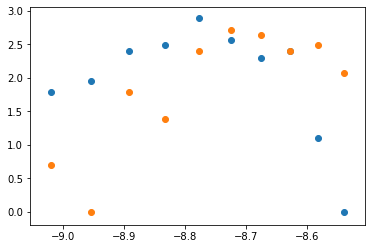

In [254]:
ind=150
y, x = np.histogram(aa_spl[ind])
plt.scatter(np.log(x[1:]), np.log(y))
yy, xx = np.histogram(bb_spl[ind], bins=x)
plt.scatter(np.log(xx[1:]), np.log(yy))

In [239]:
corr = []
for ind in range(426):
    y, x = np.histogram(aa_spl[ind])
    yy, xx = np.histogram(bb_spl[ind], bins=x)
    corr.append(np.corrcoef(np.log1p(y), np.log1p(yy))[1,0])
corr = np.array(corr)

/home/kurmukov/miniconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/kurmukov/miniconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [240]:
np.mean(corr), np.std(corr)

(nan, nan)

#### boxes

In [241]:
a_mean_spl = []
b_mean_spl = []
for a,b in zip(aa_spl, bb_spl):
    a_mean_spl.append(np.mean(a))
    b_mean_spl.append(np.mean(b))
a_mean_spl = np.array(a_mean_spl)
b_mean_spl = np.array(b_mean_spl)

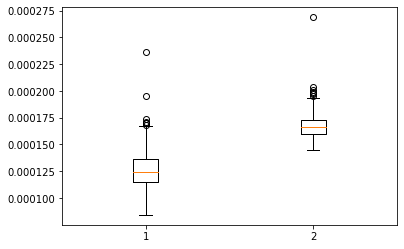

In [243]:
plt.boxplot([a_mean_spl, b_mean_spl]);

(-0.0001, 0.0002)

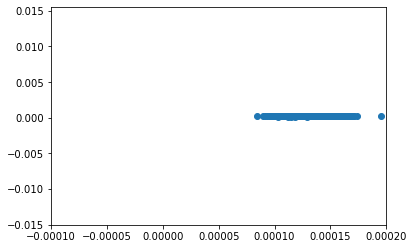

In [250]:
plt.scatter(a_mean_spl, b_mean_spl)
plt.xlim(-.0001, .0002)
plt.ylim(.08, .11)

### Clustering coef

In [171]:
adj = glob('/data01/ayagoz/sparse_32_concon_HCP/connectomes/individual_louvain_parcellation/level3/10/*.npy')
aa_clustering = []
bb_clustering = []
for path in tqdm(adj):
    a = np.load(path)
    b = np.load(f"/data01/ayagoz/sparse_32_concon_HCP/connectomes/Ensemble_parcellation/Aver_level3/10/{path.split('/')[-1]}")
    aa_clustering.append(list(compute_clustering(a, mode='log_normed').values()))
    bb_clustering.append(list(compute_clustering(b, mode='log_normed').values()))
#     aa_clustering.append(list(compute_clustering(a, mode=None).values()))
#     bb_clustering.append(list(compute_clustering(b, mode=None).values()))

100%|██████████| 426/426 [06:57<00:00,  1.06it/s]


In [4]:
adj = glob('/data01/ayagoz/sparse_32_concon_HCP/connectomes/individual_louvain_parcellation/level3/10/*.npy')
aa_clustering = []
bb_clustering = []
for path in tqdm(adj):
    a = np.load(path)
    b = np.load(f"/data01/ayagoz/sparse_32_concon_HCP/connectomes/Ensemble_parcellation/HE_level3/10/{path.split('/')[-1]}")
    aa_clustering.append(list(compute_clustering(a, mode='log_normed').values()))
    bb_clustering.append(list(compute_clustering(b, mode='log_normed').values()))

100%|██████████| 426/426 [06:55<00:00,  1.06it/s]


In [15]:
adj = glob('/data01/ayagoz/sparse_32_concon_HCP/connectomes/individual_louvain_parcellation/level3/10/*.npy')
# aa_clustering = []
bb_clustering = []
for path in tqdm(adj):
#     a = np.load(path)
    b = np.load(f"/data01/ayagoz/sparse_32_concon_HCP/connectomes/Ensemble_parcellation/CSPA_level3/10/{path.split('/')[-1]}")
#     aa_clustering.append(list(compute_clustering(a, mode='log_normed').values()))
    bb_clustering.append(list(compute_clustering(b, mode='log_normed').values()))

100%|██████████| 426/426 [00:00<00:00, 736.79it/s]


In [39]:
adj = glob('/data01/ayagoz/sparse_32_concon_HCP/connectomes/Destrieux_aparc2009_resolution/10/*.npy')
destrieux_clustering = []
# for path in tqdm(adj):
#     a = np.load(path)
#     destrieux_clustering.append(compute_clustering(a, mode='log_normed'))
destrieux_clustering = Parallel(10)(delayed(compute_clustering)(np.load(path),
                                                                'log_normed') for path in tqdm(adj))

adj = glob('/data01/ayagoz/sparse_32_concon_HCP/connectomes/Desikan_aparc_resolution/10/*.npy')
# desikan_clustering = []
# for path in tqdm(adj):
#     a = np.load(path)
#     desikan_clustering.append(compute_clustering(a, mode='log_normed'))
desikan_clustering = Parallel(10)(delayed(compute_clustering)(np.load(path),
                                                                'log_normed') for path in tqdm(adj))
destrieux_clustering= np.array(destrieux_clustering)
desikan_clustering = np.array(desikan_clustering)



  0%|          | 0/425 [00:00<?, ?it/s]

  5%|▍         | 20/425 [00:00<00:19, 20.69it/s]

  5%|▌         | 23/425 [00:01<00:19, 21.02it/s]

  7%|▋         | 28/425 [00:01<00:17, 22.39it/s]

  7%|▋         | 30/425 [00:02<01:03,  6.24it/s]

  8%|▊         | 34/425 [00:02<00:46,  8.32it/s]

  9%|▊         | 37/425 [00:02<00:37, 10.29it/s]

  9%|▉         | 40/425 [00:03<01:00,  6.39it/s]

 10%|▉         | 42/425 [00:03<00:48,  7.93it/s]

 11%|█▏        | 48/425 [00:03<00:35, 10.67it/s]

 12%|█▏        | 51/425 [00:04<00:55,  6.74it/s]

 13%|█▎        | 54/425 [00:04<00:45,  8.14it/s]

 14%|█▎        | 58/425 [00:04<00:34, 10.69it/s]

 14%|█▍        | 61/425 [00:05<00:59,  6.09it/s]

 15%|█▌        | 64/425 [00:05<00:47,  7.53it/s]

 16%|█▌        | 68/425 [00:05<00:36,  9.87it/s]

 17%|█▋        | 71/425 [00:06<00:55,  6.43it/s]

 17%|█▋        | 73/425 [00:07<00:52,  6.73it/s]

 18%|█▊        | 75/425 [00:07<00:42,  8.29it/s]

 18%|█▊        | 78/425 [00:07<00:36,  9.57it/s]

 19%|█▉

In [44]:
destrieux_clustering

array([{0: 0.09098379662640853, 1: 0.10137441679018105, 2: 0.11800538953240755, 3: 0.07889711238046694, 4: 0.10884556409740233, 5: 0.10334867403522402, 6: 0.11722890322518656, 7: 0.12006667365812991, 8: 0.10674263492017495, 9: 0.10911083231147249, 10: 0.09146901718190723, 11: 0.09366215531818245, 12: 0.10287245711333456, 13: 0.08947503744259834, 14: 0.07796795662624868, 15: 0.08886851298628073, 16: 0.07782061449506199, 17: 0.08350846109064645, 18: 0.09491592226935518, 19: 0.0862072962852044, 20: 0.08883205422776448, 21: 0.08845088749560763, 22: 0.07941602516096175, 23: 0.08239903055909145, 24: 0.07405571651798071, 25: 0.07597423015525641, 26: 0.09228302924469872, 27: 0.0806026355891642, 28: 0.08252626685704571, 29: 0.10050830719182406, 30: 0.11915100704672464, 31: 0.13051464886837444, 32: 0.07559673569291026, 33: 0.08192386369637784, 34: 0.08690839607362215, 35: 0.09479736387836896, 36: 0.10075723704014267, 37: 0.11160450755747706, 38: 0.10738858223258006, 39: 0.1026002201504152, 40: 0

In [48]:
destrieux_mean_clustering = []
desikan_mean_clustering = []
for a,b in zip(destrieux_clustering, desikan_clustering):
    destrieux_mean_clustering.append(np.mean(list(a.values())))
    desikan_mean_clustering.append(np.mean(list(b.values())))
desikan_mean_clustering = np.array(desikan_mean_clustering)
destrieux_mean_clustering = np.array(destrieux_mean_clustering)

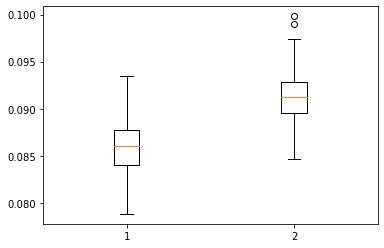

In [51]:
plt.boxplot([desikan_mean_clustering, destrieux_mean_clustering]);

In [172]:
# adj = glob('/data01/ayagoz/sparse_32_concon_HCP/connectomes/individual_louvain_parcellation/level3/10/*.npy')
# aa = []
# bb = []
# for path in tqdm(adj):
#     a = np.load(path)
#     b = np.load(f"/data01/ayagoz/sparse_32_concon_HCP/connectomes/Ensemble_parcellation/HE_level3/10/{path.split('/')[-1]}")
#     aa.append(np.mean(list(compute_clustering(a, mode=None).values())))
#     bb.append(np.mean(list(compute_clustering(b, mode=None).values())))
# aa = np.array(aa)*100
# bb = np.array(bb)*100

/home/kurmukov/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


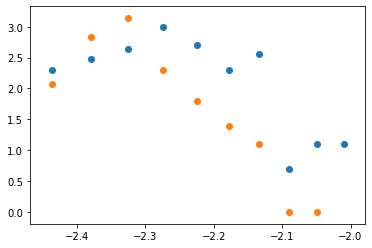

In [174]:
ind=123
y, x = np.histogram(aa_clustering[ind])
plt.scatter(np.log(x[1:]), np.log(y))
yy, xx = np.histogram(bb_clustering[ind], bins=x)
plt.scatter(np.log(xx[1:]), np.log(yy))

In [5]:
corr = []
for ind in range(426):
    y, x = np.histogram(aa_clustering[ind])
    yy, xx = np.histogram(bb_clustering[ind], bins=x)
    corr.append(np.corrcoef(np.log1p(y), np.log1p(yy))[1,0])
corr = np.array(corr)

In [176]:
# Aver3
np.mean(corr), np.std(corr)

(0.7849889949686241, 0.13736897665543868)

In [6]:
# HE3
np.mean(corr), np.std(corr)

(0.5981785034710679, 0.1863042738656627)

In [16]:
# CSPA3
np.mean(corr), np.std(corr)

(0.8773472147834669, 0.06282341260983203)

In [ ]:
corr = []
for ind in range(426):
    y, x = np.histogram(aa_clustering[ind])
    yy, xx = np.histogram(bb_clustering[ind], bins=x)
    corr.append(np.corrcoef(np.log1p(y), np.log1p(yy))[1,0])
corr = np.array(corr)

#### boxes

In [7]:
a_mean_clustering = []
b_mean_clustering = []
for a,b in zip(aa_clustering, bb_clustering):
    a_mean_clustering.append(np.mean(a))
    b_mean_clustering.append(np.mean(b))
a_mean_clustering = np.array(a_mean_clustering)
b_mean_clustering = np.array(b_mean_clustering)

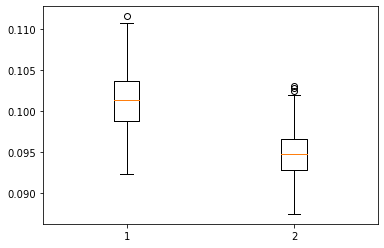

In [178]:
plt.boxplot([a_mean_clustering, b_mean_clustering]);

(0.08, 0.11)

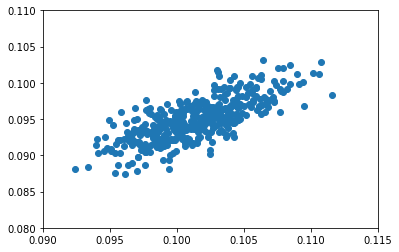

In [211]:
plt.scatter(a_mean_clustering, b_mean_clustering)
plt.xlim(.09, .115)
plt.ylim(.08, .11)

In [260]:
# Aver3
np.corrcoef(a_mean_clustering, b_mean_clustering)

array([[1.        , 0.74322343],
       [0.74322343, 1.        ]])

In [8]:
# HE3
np.corrcoef(a_mean_clustering, b_mean_clustering)

array([[1.       , 0.7225635],
       [0.7225635, 1.       ]])

In [17]:
# CSPA3
np.corrcoef(a_mean_clustering, b_mean_clustering)

array([[1.       , 0.7225635],
       [0.7225635, 1.       ]])

### Degree

In [333]:
adj = glob('/data01/ayagoz/sparse_32_concon_HCP/connectomes/individual_louvain_parcellation/level3/20/*.npy')
aa_degree = []
bb_degree = []
for path in tqdm(adj):
    a = np.load(path)
    b = np.load(f"/data01/ayagoz/sparse_32_concon_HCP/connectomes/Ensemble_parcellation/Aver_level3/10/{path.split('/')[-1]}")
    aa_degree.append(compute_degree(a, mode='log_normed')) # normed_inversed
    bb_degree.append(compute_degree(b, mode='log_normed'))

100%|██████████| 426/426 [00:00<00:00, 800.74it/s]


In [9]:
adj = glob('/data01/ayagoz/sparse_32_concon_HCP/connectomes/individual_louvain_parcellation/level3/20/*.npy')
aa_degree = []
bb_degree = []
for path in tqdm(adj):
    a = np.load(path)
    b = np.load(f"/data01/ayagoz/sparse_32_concon_HCP/connectomes/Ensemble_parcellation/HE_level3/10/{path.split('/')[-1]}")
    aa_degree.append(compute_degree(a, mode='log_normed')) # normed_inversed
    bb_degree.append(compute_degree(b, mode='log_normed'))

100%|██████████| 426/426 [00:00<00:00, 870.34it/s]


In [18]:
adj = glob('/data01/ayagoz/sparse_32_concon_HCP/connectomes/individual_louvain_parcellation/level3/20/*.npy')
# aa_degree = []
bb_degree = []
for path in tqdm(adj):
#     a = np.load(path)
    b = np.load(f"/data01/ayagoz/sparse_32_concon_HCP/connectomes/Ensemble_parcellation/CSPA_level3/10/{path.split('/')[-1]}")
#     aa_degree.append(compute_degree(a, mode='log_normed')) # normed_inversed
    bb_degree.append(compute_degree(b, mode='log_normed'))

100%|██████████| 426/426 [00:00<00:00, 3284.32it/s]


/home/kurmukov/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/home/kurmukov/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


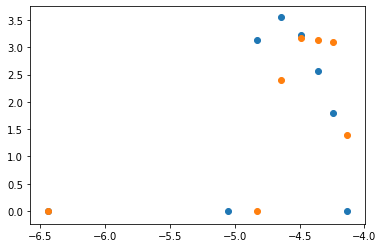

In [334]:
ind=123
y, x = np.histogram(aa_degree[ind])
plt.scatter(np.log(x[1:]), np.log(y))
yy, xx = np.histogram(bb_degree[ind], bins=x)
plt.scatter(np.log(xx[1:]), np.log(yy))

In [10]:
corr = []
for ind in range(426):
    y, x = np.histogram(aa_degree[ind])
    yy, xx = np.histogram(bb_degree[ind], bins=x)
    corr.append(np.corrcoef(np.log1p(y), np.log1p(yy))[1,0])
corr = np.array(corr)

In [336]:
# Aver3
np.mean(corr), np.std(corr)

(0.8518909211121248, 0.08115397211182573)

In [11]:
# HE3
np.mean(corr), np.std(corr)

(0.8773472147834669, 0.06282341260983203)

In [19]:
# CSPA3
np.mean(corr), np.std(corr)

(0.8773472147834669, 0.06282341260983203)

#### boxes

In [194]:
a_mean_degree = []
b_mean_degree = []
for a,b in zip(aa_degree, bb_degree):
    a_mean_degree.append(np.mean(a))
    b_mean_degree.append(np.mean(b))
a_mean_degree = np.array(a_mean_degree)
b_mean_degree = np.array(b_mean_degree)

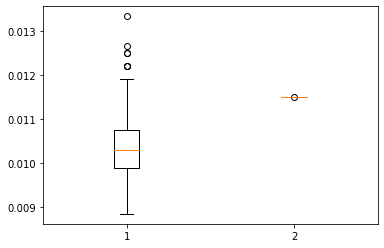

In [195]:
plt.boxplot([a_mean_degree, b_mean_degree]);

In [196]:
a_mean_degree

array([0.01190476, 0.01086957, 0.01030928, 0.01030928, 0.01020408,
       0.00990099, 0.01020408, 0.01030928, 0.01075269, 0.01      ,
       0.01041667, 0.01098901, 0.01052632, 0.0106383 , 0.01075269,
       0.01052632, 0.00990099, 0.01098901, 0.00943396, 0.01075269,
       0.00970874, 0.00990099, 0.01052632, 0.01010101, 0.01030928,
       0.01041667, 0.01098901, 0.01030928, 0.00961538, 0.01086957,
       0.01030928, 0.00925926, 0.01030928, 0.00943396, 0.00952381,
       0.01      , 0.01111111, 0.01041667, 0.00990099, 0.01086957,
       0.01      , 0.01176471, 0.01176471, 0.00892857, 0.0106383 ,
       0.01020408, 0.01052632, 0.0106383 , 0.00970874, 0.01      ,
       0.00970874, 0.01030928, 0.01020408, 0.01052632, 0.01041667,
       0.01020408, 0.01020408, 0.01020408, 0.01010101, 0.01111111,
       0.00980392, 0.00952381, 0.00970874, 0.00884956, 0.01086957,
       0.01123596, 0.01086957, 0.01123596, 0.01075269, 0.01030928,
       0.01      , 0.00892857, 0.00970874, 0.01041667, 0.01041

In [438]:
font = {'family' : 'monospace',
        'size'   : 16}

plt.rc('font', **font)

In [62]:
# s = 15
# fig3 = plt.figure(constrained_layout=True, figsize=(14,9))
# gs = fig3.add_gridspec(2, 3)

# f3_ax1 = fig3.add_subplot(gs[0, 0])

# f3_ax1.boxplot([aa_apl[aa_apl<.00019], bb_apl[aa_apl<.00019]],
#                 notch=True,
#                 showfliers=False,
#                 widths=0.1,
#                 labels = ['Subject', 'Ensemble']);
# # f3_ax1.set_title('Average\npath length')
# f3_ax1.set_yticks([.00010, .00015, .0002])
# f3_ax1.set_yticklabels(['$10\cdot10^{-5}$', '$15\cdot10^{-5}$', '$20\cdot10^{-5}$'])

# f3_ax2 = fig3.add_subplot(gs[1, 0])

# f3_ax2.boxplot([a_mean_clustering, b_mean_clustering],
#                  notch=True,
#                  showfliers=False,
#                  widths=0.1,
#                 labels = ['Subject', 'Ensemble']);
# f3_ax2.set_yticks([.090, .1, .11])
# f3_ax2.set_yticklabels(['$9\cdot10^{-2}$', '$10\cdot10^{-2}$', '$11\cdot10^{-2}$']);
# # f3_ax2.set_title('Average\nclustering coefficient');

# f3_ax3 = fig3.add_subplot(gs[0, 1:])
# f3_ax3.scatter(bb_apl[aa_apl<.00019], aa_apl[aa_apl<.00019], s = s, c='royalblue')
# f3_ax3.set_ylim(.00008, .00022)
# f3_ax3.set_yticks([.00010, .00015, .0002])
# f3_ax3.set_yticklabels(['', '', ''])
# f3_ax3.set_xlim(.00013, .000225)
# f3_ax3.set_xticks([.00014, .00018, .00022])
# f3_ax3.set_xticklabels(['$14\cdot10^{-5}$', '$18\cdot10^{-5}$',
#                            '$22\cdot10^{-5}$'])

# f3_ax3.plot([.00014,  .00022], [.000095, .000162], c = 'tab:red', ls='--', alpha=0.8, label='Correlation$= 0.58$')
# f3_ax3.legend(loc='upper left')
# # f3_ax3.set_xlabel('Ensemble\nparcellation')
# # f3_ax3.set_ylabel('Subject\nparcellation')
# f3_ax3.set_xlabel('Ensemble')
# f3_ax3.set_ylabel('Subject')
# f3_ax3.set_title('Average path length')

# f3_ax4 = fig3.add_subplot(gs[1, 1:])

# f3_ax4.scatter(a_mean_clustering, b_mean_clustering, s = s, c='royalblue')

# ###############
# f3_ax4.plot([.091,  .112], [.088, .101], c = 'tab:red', ls='--', alpha=0.8, label='Correlation$= 0.78$')
# f3_ax4.legend(loc='upper left')
# f3_ax4.set_xlim(.088, .115)
# f3_ax4.set_ylim(.085, .113)
# f3_ax4.set_xticks([.09,.10,.11])
# f3_ax4.set_yticks([.09,.10,.11])
# f3_ax4.set_yticklabels(['', '', ''])
# f3_ax4.set_xticklabels(['$9\cdot10^{-2}$',
#                           '$10\cdot10^{-2}$',
#                           '$11\cdot10^{-2}$'])

# f3_ax4.set_xlabel('Ensemble')
# f3_ax4.set_ylabel('Subject');
# f3_ax4.set_title('Average clustering coefficient');
# fig3.savefig('/home/kurmukov/apl_clustering.png', dpi=300, transparent=True)

# Save parcellations as .raw

In [1]:
import os

In [2]:
paths = []
trunc_path = []
method = []
resolution = []
sparsity = []
for dirpath, dirnames, filenames in os.walk('/data01/ayagoz/sparse_32_concon_HCP/parcellations/ensemble_parcellation'):
    if ('shuffle' not in dirpath):
        for filename in filenames:
            if '.py' not in filename:
                p = os.path.join(dirpath, filename)
                paths.append(p)
                trunc_path.append('/'.join(p.split('/')[6:]))
                if 'connectivity_parcellation_level' in p:
                    method.append('HE')
                    resolution.append(int(p.split('/')[-3][-1]))
                    sparsity.append(int(p.split('/')[-2]))
                elif 'average_network_partition' in p:
                    method.append('Aver')
                    resolution.append(int(p.split('/')[-2][-1]))
                    sparsity.append(int(p.split('/')[-1].split('_')[-1].split('.')[0]))
                elif 'CSPA' in p:
                    method.append('CSPA')
                    resolution.append(int(p.split('/')[-2][-1]))
                    sparsity.append(int(p.split('/')[-1].split('_')[-1].split('.')[0]))

In [3]:
import pandas as pd

In [4]:
paths.append('/data01/ayagoz/sparse_32_concon_HCP/parcellations/desikan_aparc_average_1113.npy')
paths.append('/data01/ayagoz/sparse_32_concon_HCP/parcellations/destrieux_aparc2009_average_1113.npy')
method.append('desikan_average')
method.append('destrieux_average')
resolution.append('none')
resolution.append('none')
sparsity.append('none')
sparsity.append('none')

path_meta = pd.DataFrame(paths, columns=['path_to_partition'])
path_meta['method'] = method
path_meta['resolution'] = resolution
path_meta['sparsity'] = sparsity

In [236]:
desik = np.load('/data01/ayagoz/sparse_32_concon_HCP/parcellations/desikan_aparc_average_1113.npy')
saveto = '/data01/ayagoz/sparse_32_concon_HCP/parcellations/all_parcellations_raw'
idx = desik!=-1
for p in path_meta.itertuples():
    labels = np.load(p.path_to_partition)
    method = p.method
    resolution = p.resolution
    sparsity = p.sparsity
#     print(method)
    if method == 'desikan_average' or method == 'destrieux_average':
        labels.astype(np.float32).tofile(f'{saveto}/{method}.raw')
    else:        
        parcellation = np.zeros_like(desik) - 1
        parcellation[idx] = labels
        parcellation.astype(np.float32).tofile(f'{saveto}/{method}_{resolution}_{sparsity}.raw')

In [38]:
from glob import glob

In [41]:
os.listdir('/data01/ayagoz/sparse_32_concon_HCP/parcellations/connectivity_parcellation_level1/10/')[:10]

['212217.npy',
 '180836.npy',
 '175439.npy',
 '175035.npy',
 '173536.npy',
 '200614.npy',
 '157336.npy',
 '151223.npy',
 '104416.npy',
 '151627.npy']

In [43]:
from tqdm import tqdm

In [50]:
desik = np.load('/data01/ayagoz/sparse_32_concon_HCP/parcellations/desikan_aparc_average_1113.npy')
saveto = '/data01/ayagoz/sparse_32_concon_HCP/parcellations/sample_individual_parcellations_raw'
source = '/data01/ayagoz/sparse_32_concon_HCP/parcellations/connectivity_parcellation_level'
idx = desik!=-1
sparsity = 100
for subject in ['280739.npy', '195647.npy', '177342.npy', '102513.npy', '123420.npy',
'119833.npy', '146634.npy', '168745.npy', '156233.npy', '316633.npy']:
    for level in [1,2,3]:
        labels = np.load(f'{source}{level}/100/{subject}')
        if level == 3:
            print(adjusted_mutual_info_score(he, labels))
        parcellation = np.zeros_like(desik) - 1
        parcellation[idx] = labels
        parcellation.astype(np.float32).tofile(f'{saveto}/{subject.split(".")[0]}_level{level}_{sparsity}.raw')
        

0.7222159022051085
0.7185089627502108
0.7238065398362837
0.7248502490236002
0.7214673568444304
0.7177542405076129
0.7204122913284949
0.7237813894518915
0.7185840789590029
0.7115018379930803


In [45]:
he = np.load('/data01/ayagoz/sparse_32_concon_HCP/parcellations/ensemble_parcellation/connectivity_parcellation_level3/100/ensemble_3_100.npy')

In [46]:
from sklearn.metrics import adjusted_mutual_info_score

In [48]:
for subject in tqdm(os.listdir('/data01/ayagoz/sparse_32_concon_HCP/parcellations/connectivity_parcellation_level1/10/')):
    level= 3
    labels = np.load(f'{source}{level}/100/{subject}')
    print(subject, adjusted_mutual_info_score(he, labels))

  0%|          | 2/426 [00:00<01:15,  5.58it/s]

212217.npy 0.6777111214855087
180836.npy 0.6887073248286679


  1%|          | 4/426 [00:00<01:16,  5.53it/s]

175439.npy 0.7091288369004237
175035.npy 0.7001797359067011


  1%|▏         | 6/426 [00:01<01:16,  5.47it/s]

173536.npy 0.6794804359210814
200614.npy 0.68312482178854


  2%|▏         | 8/426 [00:01<01:20,  5.19it/s]

157336.npy 0.704168935737979
151223.npy 0.6919686726503825


  2%|▏         | 10/426 [00:01<01:21,  5.11it/s]

104416.npy 0.6926073878382286
151627.npy 0.6943210908698457


  3%|▎         | 12/426 [00:02<01:21,  5.07it/s]

187547.npy 0.6980826166736871
295146.npy 0.7061523299414216


  3%|▎         | 13/426 [00:02<01:22,  5.02it/s]

111716.npy 0.7033496800599673


  4%|▎         | 15/426 [00:02<01:21,  5.05it/s]

160729.npy 0.6870971543657015
162935.npy 0.7042800835998223


  4%|▍         | 17/426 [00:03<01:21,  5.02it/s]

185139.npy 0.699437508815551
188347.npy 0.7116258649905641


  4%|▍         | 19/426 [00:03<01:19,  5.14it/s]

116221.npy 0.6959566672711862
211922.npy 0.7099604759222093


  5%|▍         | 20/426 [00:03<01:18,  5.15it/s]

155231.npy 0.7104316104026442


  5%|▍         | 21/426 [00:04<01:19,  5.07it/s]

236130.npy 0.6903283334415563


  5%|▌         | 23/426 [00:04<01:20,  5.00it/s]

172433.npy 0.688701958521755
293748.npy 0.6765634181802263


  6%|▌         | 25/426 [00:04<01:18,  5.10it/s]

214524.npy 0.6897087105716618
151425.npy 0.7148527169585619


  6%|▋         | 27/426 [00:05<01:18,  5.08it/s]

204622.npy 0.7041574450324943
103818.npy 0.697939265152899


  7%|▋         | 29/426 [00:05<01:17,  5.13it/s]

111413.npy 0.6958278811066697
189450.npy 0.7010803702277947


  7%|▋         | 30/426 [00:05<01:18,  5.07it/s]

131722.npy 0.693976755614996


  7%|▋         | 31/426 [00:06<01:18,  5.03it/s]

142626.npy 0.6971405759335582


  8%|▊         | 32/426 [00:06<01:18,  5.01it/s]

171532.npy 0.6830295205397217


  8%|▊         | 34/426 [00:06<01:18,  5.00it/s]

196144.npy 0.702810564344034
173637.npy 0.6936537228273636


  8%|▊         | 36/426 [00:07<01:16,  5.10it/s]

178647.npy 0.6921489453204206
185947.npy 0.7055920524203464


  9%|▉         | 38/426 [00:07<01:15,  5.11it/s]

129634.npy 0.6739833673072824
154734.npy 0.6890459634421484


  9%|▉         | 39/426 [00:07<01:15,  5.14it/s]

105216.npy 0.7181763404168686


 10%|▉         | 41/426 [00:08<01:16,  5.06it/s]

172534.npy 0.6789330294266248
110613.npy 0.6999183217704121


 10%|█         | 43/426 [00:08<01:12,  5.28it/s]

106319.npy 0.7171505743997415
150928.npy 0.6967287266069483


 11%|█         | 45/426 [00:08<01:11,  5.29it/s]

129129.npy 0.7100826157489554
101915.npy 0.712562487969526


 11%|█         | 47/426 [00:09<01:12,  5.25it/s]

196346.npy 0.6805621220849633
110411.npy 0.7057261546705471


 12%|█▏        | 49/426 [00:09<01:10,  5.33it/s]

280941.npy 0.7025531396286069
172332.npy 0.7051970797971356


 12%|█▏        | 51/426 [00:09<01:11,  5.26it/s]

231928.npy 0.7000196715798893
122620.npy 0.6835160202982564


 12%|█▏        | 53/426 [00:10<01:11,  5.24it/s]

210011.npy 0.7049619720118968
205725.npy 0.6913509524497411


 13%|█▎        | 55/426 [00:10<01:10,  5.28it/s]

100307.npy 0.6885644488199448
213421.npy 0.7029794328339468


 13%|█▎        | 57/426 [00:11<01:09,  5.35it/s]

128127.npy 0.709068977497197
207123.npy 0.7029787973959631


 14%|█▍        | 59/426 [00:11<01:08,  5.32it/s]

159239.npy 0.6831063959080294
305830.npy 0.7042029427100966


 14%|█▍        | 60/426 [00:11<01:09,  5.26it/s]

207426.npy 0.6982479811878798


 15%|█▍        | 62/426 [00:12<01:10,  5.16it/s]

116524.npy 0.6724985426367105
209329.npy 0.692181522228013


 15%|█▌        | 64/426 [00:12<01:10,  5.15it/s]

172029.npy 0.7063191784333521
171330.npy 0.6779458582430847


 15%|█▌        | 66/426 [00:12<01:08,  5.22it/s]

120212.npy 0.7017130688723172
202113.npy 0.6918438178667151


 16%|█▌        | 68/426 [00:13<01:07,  5.30it/s]

169949.npy 0.7109420427873558
179952.npy 0.6984981106215686


 16%|█▋        | 70/426 [00:13<01:07,  5.29it/s]

194645.npy 0.6953341662991327
200109.npy 0.7157371877766062


 17%|█▋        | 72/426 [00:13<01:06,  5.28it/s]

165840.npy 0.6998801103599576
182840.npy 0.6953831076488037


 17%|█▋        | 74/426 [00:14<01:06,  5.30it/s]

145834.npy 0.7043427555695827
221319.npy 0.7010273664272451


 18%|█▊        | 76/426 [00:14<01:07,  5.19it/s]

132017.npy 0.6794574623451259
317332.npy 0.6963490341985853


 18%|█▊        | 78/426 [00:15<01:07,  5.16it/s]

195647.npy 0.7185089627502108
135225.npy 0.6980243509253088


 19%|█▉        | 80/426 [00:15<01:06,  5.24it/s]

188549.npy 0.7004102426758589
144832.npy 0.6996099341857184


 19%|█▉        | 82/426 [00:15<01:06,  5.20it/s]

200311.npy 0.7054534015533426
200008.npy 0.7019693380555457


 20%|█▉        | 84/426 [00:16<01:06,  5.17it/s]

166640.npy 0.6954354639000472
156637.npy 0.7076758862434376


 20%|█▉        | 85/426 [00:16<01:04,  5.26it/s]

212823.npy 0.7136816297853661


 20%|██        | 87/426 [00:16<01:05,  5.20it/s]

178142.npy 0.6752329491545697
171633.npy 0.7014361291216689


 21%|██        | 88/426 [00:16<01:03,  5.31it/s]

114217.npy 0.6883822375140113


 21%|██        | 90/426 [00:17<01:03,  5.31it/s]

133928.npy 0.6953285036975629
154229.npy 0.6901667583288639


 21%|██▏       | 91/426 [00:17<01:06,  5.07it/s]

107018.npy 0.6818343578002862


 22%|██▏       | 92/426 [00:17<01:07,  4.94it/s]

268850.npy 0.7066809700735968


 22%|██▏       | 93/426 [00:18<01:10,  4.74it/s]

239944.npy 0.6939196203792014


 22%|██▏       | 94/426 [00:18<01:12,  4.58it/s]

212419.npy 0.6869680567056775


 22%|██▏       | 95/426 [00:18<01:12,  4.54it/s]

275645.npy 0.6883205247488143


 23%|██▎       | 96/426 [00:18<01:12,  4.56it/s]

187345.npy 0.6851966298486428


 23%|██▎       | 97/426 [00:18<01:14,  4.42it/s]

105014.npy 0.6964918818409345


 23%|██▎       | 98/426 [00:19<01:12,  4.49it/s]

199453.npy 0.6836447667825342


 23%|██▎       | 99/426 [00:19<01:11,  4.56it/s]

138231.npy 0.7025650461313632


 23%|██▎       | 100/426 [00:19<01:10,  4.63it/s]

173334.npy 0.6948863188100514


 24%|██▍       | 102/426 [00:19<01:09,  4.68it/s]

192843.npy 0.7125043215324807
208327.npy 0.7124773059854351


 24%|██▍       | 103/426 [00:20<01:06,  4.83it/s]

155635.npy 0.688875651812763


 24%|██▍       | 104/426 [00:20<01:08,  4.68it/s]

173839.npy 0.6934766462425296


 25%|██▍       | 106/426 [00:20<01:08,  4.65it/s]

148335.npy 0.6825287621379117
284646.npy 0.6798958509880465


 25%|██▌       | 107/426 [00:21<01:09,  4.59it/s]

123925.npy 0.6952181439499616


 25%|██▌       | 108/426 [00:21<01:09,  4.60it/s]

322224.npy 0.6858261666222848


 26%|██▌       | 109/426 [00:21<01:08,  4.61it/s]

178243.npy 0.7088749242134913


 26%|██▌       | 110/426 [00:21<01:11,  4.40it/s]

217126.npy 0.6911697544315223


 26%|██▋       | 112/426 [00:22<01:08,  4.61it/s]

118124.npy 0.6943062004851343
198653.npy 0.6909808979855754


 27%|██▋       | 113/426 [00:22<01:07,  4.62it/s]

117930.npy 0.6805721443776502


 27%|██▋       | 114/426 [00:22<01:08,  4.57it/s]

173738.npy 0.68755773599476


 27%|██▋       | 115/426 [00:22<01:08,  4.54it/s]

166438.npy 0.6956354933327695


 27%|██▋       | 117/426 [00:23<01:04,  4.77it/s]

150625.npy 0.7083465251964178
204420.npy 0.701781111001094


 28%|██▊       | 118/426 [00:23<01:04,  4.79it/s]

180937.npy 0.7127493239567345


 28%|██▊       | 120/426 [00:23<01:02,  4.93it/s]

154835.npy 0.685353781909485
146432.npy 0.7095293320668778


 28%|██▊       | 121/426 [00:24<01:05,  4.69it/s]

176037.npy 0.6989415676738918


 29%|██▊       | 122/426 [00:24<01:05,  4.61it/s]

137633.npy 0.6829772449186821


 29%|██▉       | 124/426 [00:24<01:02,  4.80it/s]

209935.npy 0.6980790021677247
153227.npy 0.6792929565564492


 29%|██▉       | 125/426 [00:24<01:00,  4.95it/s]

108828.npy 0.710444118619394


 30%|██▉       | 127/426 [00:25<00:59,  5.03it/s]

194140.npy 0.6909443725206402
147030.npy 0.6926766454922502


 30%|███       | 128/426 [00:25<01:01,  4.87it/s]

209127.npy 0.698321947854688


 31%|███       | 130/426 [00:25<00:59,  4.96it/s]

223929.npy 0.7098001070778279
187850.npy 0.7065098135119678


 31%|███       | 132/426 [00:26<00:57,  5.08it/s]

178849.npy 0.7154071418922164
290136.npy 0.6933696927312376


 31%|███▏      | 134/426 [00:26<00:57,  5.10it/s]

205220.npy 0.7163860519349515
104820.npy 0.6904072719647186


 32%|███▏      | 135/426 [00:26<00:56,  5.19it/s]

167238.npy 0.705644511062827


 32%|███▏      | 137/426 [00:27<00:56,  5.12it/s]

112516.npy 0.7025986539728412
257845.npy 0.6935409313003982


 32%|███▏      | 138/426 [00:27<00:58,  4.95it/s]

149236.npy 0.7010674760547259


 33%|███▎      | 140/426 [00:27<00:59,  4.81it/s]

119833.npy 0.7177542405076129
198350.npy 0.6885788985143446


 33%|███▎      | 141/426 [00:28<00:58,  4.90it/s]

173940.npy 0.7060225050720003


 34%|███▎      | 143/426 [00:28<00:57,  4.89it/s]

119732.npy 0.6925702056860786
211316.npy 0.7061475940089934


 34%|███▍      | 145/426 [00:28<00:55,  5.10it/s]

179245.npy 0.7062541619654991
131924.npy 0.6953780801913696


 34%|███▍      | 146/426 [00:29<00:54,  5.18it/s]

118528.npy 0.7139011045333923


 35%|███▍      | 148/426 [00:29<00:55,  4.98it/s]

309636.npy 0.6900483669291051
134425.npy 0.6974984613970288


 35%|███▌      | 150/426 [00:29<00:54,  5.04it/s]

164636.npy 0.678408659650166
152831.npy 0.7017658865384014


 35%|███▌      | 151/426 [00:30<00:53,  5.14it/s]

154936.npy 0.7071344334141949


 36%|███▌      | 152/426 [00:30<00:54,  5.04it/s]

180432.npy 0.6924062659752728


 36%|███▌      | 153/426 [00:30<00:55,  4.90it/s]

308129.npy 0.7005464827608143


 36%|███▋      | 155/426 [00:30<00:56,  4.79it/s]

199150.npy 0.6851272168247157
108222.npy 0.6983557317485286


 37%|███▋      | 156/426 [00:31<00:56,  4.77it/s]

209228.npy 0.6968931015945129


 37%|███▋      | 158/426 [00:31<00:55,  4.87it/s]

289555.npy 0.6878166328488303
193441.npy 0.7139588456573323


 37%|███▋      | 159/426 [00:31<00:54,  4.92it/s]

192136.npy 0.7007136093837522


 38%|███▊      | 160/426 [00:32<00:55,  4.78it/s]

160931.npy 0.7047128019110933


 38%|███▊      | 162/426 [00:32<00:54,  4.85it/s]

123117.npy 0.6870202356268722
285446.npy 0.7112233118223773


 38%|███▊      | 164/426 [00:32<00:53,  4.88it/s]

143325.npy 0.7074336570355049
162026.npy 0.6767694164229648


 39%|███▊      | 165/426 [00:33<00:52,  4.95it/s]

147737.npy 0.6936977638656482


 39%|███▉      | 167/426 [00:33<00:51,  5.04it/s]

195849.npy 0.6956617734860683
123824.npy 0.7029866590034418


 40%|███▉      | 169/426 [00:33<00:48,  5.28it/s]

138534.npy 0.7060425325602833
172938.npy 0.6859647734132032


 40%|████      | 171/426 [00:34<00:48,  5.30it/s]

109123.npy 0.6937253833493306
204521.npy 0.7068037866977119


 40%|████      | 172/426 [00:34<00:48,  5.20it/s]

120717.npy 0.6826687820757014


 41%|████      | 173/426 [00:34<00:51,  4.89it/s]

102816.npy 0.6903016356403804


 41%|████      | 175/426 [00:34<00:50,  4.98it/s]

237334.npy 0.7026083567375209
248339.npy 0.6851725762252173


 41%|████▏     | 176/426 [00:35<00:49,  5.08it/s]

112920.npy 0.7206651504941711


 42%|████▏     | 178/426 [00:35<00:47,  5.23it/s]

148941.npy 0.6933253430043125
149539.npy 0.6852227725260871


 42%|████▏     | 180/426 [00:35<00:47,  5.19it/s]

111312.npy 0.690596083135247
136732.npy 0.6740043620838287


 43%|████▎     | 182/426 [00:36<00:47,  5.14it/s]

162733.npy 0.6959417197818901
144226.npy 0.677911484759256


 43%|████▎     | 183/426 [00:36<00:46,  5.19it/s]

146634.npy 0.7204122913284949


 43%|████▎     | 185/426 [00:36<00:47,  5.12it/s]

148840.npy 0.6947589511716701
108323.npy 0.694849273141071


 44%|████▎     | 186/426 [00:37<00:46,  5.20it/s]

134223.npy 0.711212377515637


 44%|████▍     | 188/426 [00:37<00:44,  5.29it/s]

121618.npy 0.6883668680787731
183337.npy 0.6790442929652102


 45%|████▍     | 190/426 [00:37<00:44,  5.30it/s]

140420.npy 0.7061425926938354
117122.npy 0.6897721562120088


 45%|████▍     | 191/426 [00:38<00:46,  5.04it/s]

298051.npy 0.702389284837305


 45%|████▌     | 193/426 [00:38<00:46,  4.99it/s]

196750.npy 0.7010694894425205
110007.npy 0.7031228443983509


 46%|████▌     | 195/426 [00:38<00:45,  5.12it/s]

175338.npy 0.7155401522192231
210617.npy 0.6914176163774156


 46%|████▌     | 196/426 [00:39<00:44,  5.17it/s]

178950.npy 0.7082512072189187


 46%|████▋     | 198/426 [00:39<00:45,  5.05it/s]

101006.npy 0.688169045176783
163836.npy 0.7063839757400144


 47%|████▋     | 200/426 [00:39<00:44,  5.06it/s]

146331.npy 0.7029524860927766
146937.npy 0.6865964532430944


 47%|████▋     | 202/426 [00:40<00:43,  5.20it/s]

182436.npy 0.7054979947576405
149842.npy 0.7042103383052201


 48%|████▊     | 203/426 [00:40<00:42,  5.28it/s]

321323.npy 0.7068457022916468


 48%|████▊     | 205/426 [00:40<00:42,  5.19it/s]

164030.npy 0.7012055851180368
208125.npy 0.7084933563854551


 49%|████▊     | 207/426 [00:41<00:42,  5.16it/s]

140117.npy 0.687187381385121
108525.npy 0.7043045209130981


 49%|████▉     | 209/426 [00:41<00:41,  5.22it/s]

228434.npy 0.6799207126356479
191336.npy 0.7140770691638406


 50%|████▉     | 211/426 [00:41<00:40,  5.26it/s]

105115.npy 0.6995078115669477
210415.npy 0.6713295492779825


 50%|█████     | 213/426 [00:42<00:40,  5.25it/s]

113215.npy 0.7077829936833739
148032.npy 0.6999997460312105


 50%|█████     | 215/426 [00:42<00:39,  5.37it/s]

211215.npy 0.7101338441626387
206222.npy 0.6947341545245291


 51%|█████     | 217/426 [00:43<00:39,  5.36it/s]

111009.npy 0.6801695735147445
283543.npy 0.7045524425376267


 51%|█████     | 218/426 [00:43<00:39,  5.32it/s]

191437.npy 0.7037151701892929


 52%|█████▏    | 220/426 [00:43<00:39,  5.16it/s]

214726.npy 0.6794002240843755
134021.npy 0.7026521445527989


 52%|█████▏    | 222/426 [00:44<00:38,  5.24it/s]

303119.npy 0.6897270520855734
181131.npy 0.7151032266148735


 53%|█████▎    | 224/426 [00:44<00:38,  5.25it/s]

192540.npy 0.713805204887544
159946.npy 0.6755854870578527


 53%|█████▎    | 226/426 [00:44<00:38,  5.23it/s]

156435.npy 0.6975917622132498
186444.npy 0.6891947205537569


 54%|█████▎    | 228/426 [00:45<00:37,  5.22it/s]

172130.npy 0.6874531560287328
151526.npy 0.6936080015601908


 54%|█████▍    | 230/426 [00:45<00:37,  5.19it/s]

103515.npy 0.6577937057876421
122822.npy 0.6814161054652309


 54%|█████▍    | 232/426 [00:45<00:36,  5.28it/s]

117324.npy 0.7107241482515884
102311.npy 0.7019990869683826


 55%|█████▍    | 234/426 [00:46<00:36,  5.21it/s]

130619.npy 0.6967447891081274
233326.npy 0.6930314317846773


 55%|█████▌    | 236/426 [00:46<00:36,  5.20it/s]

168240.npy 0.6981883829546714
214221.npy 0.6798160251756179


 56%|█████▌    | 238/426 [00:47<00:36,  5.18it/s]

203923.npy 0.7090530057769662
214019.npy 0.6975955628402033


 56%|█████▋    | 240/426 [00:47<00:35,  5.30it/s]

192035.npy 0.692089261109711
113922.npy 0.6947732197096916


 57%|█████▋    | 242/426 [00:47<00:34,  5.29it/s]

107321.npy 0.718772441039925
176744.npy 0.7021284272123487


 57%|█████▋    | 244/426 [00:48<00:34,  5.34it/s]

200917.npy 0.6824322889734163
154532.npy 0.6921252770226394


 58%|█████▊    | 246/426 [00:48<00:33,  5.33it/s]

250932.npy 0.7095101829276879
103111.npy 0.6989844703705543


 58%|█████▊    | 248/426 [00:49<00:34,  5.20it/s]

168745.npy 0.7237813894518915
114621.npy 0.6974136852595205


 59%|█████▊    | 250/426 [00:49<00:34,  5.13it/s]

318637.npy 0.6901417730717944
170934.npy 0.6799497122832218


 59%|█████▉    | 252/426 [00:49<00:32,  5.30it/s]

168139.npy 0.678146653378761
245333.npy 0.6974578154403039


 60%|█████▉    | 254/426 [00:50<00:32,  5.23it/s]

157437.npy 0.6979142884022834
175742.npy 0.6895633862225145


 60%|██████    | 256/426 [00:50<00:33,  5.13it/s]

144731.npy 0.6900338917861691
151728.npy 0.6931992287543608


 60%|██████    | 257/426 [00:50<00:32,  5.12it/s]

304020.npy 0.7004878120651835


 61%|██████    | 259/426 [00:51<00:32,  5.19it/s]

195950.npy 0.676487539145007
163331.npy 0.7030849701330968


 61%|██████▏   | 261/426 [00:51<00:31,  5.32it/s]

103414.npy 0.6992653050306511
208226.npy 0.7064153820211615


 62%|██████▏   | 263/426 [00:51<00:30,  5.30it/s]

214423.npy 0.6970713787219478
270332.npy 0.6837812212988125


 62%|██████▏   | 265/426 [00:52<00:30,  5.20it/s]

159138.npy 0.7013331949928601
194746.npy 0.6849585361549791


 63%|██████▎   | 267/426 [00:52<00:30,  5.24it/s]

308331.npy 0.6788661181098307
195445.npy 0.7108659451511665


 63%|██████▎   | 269/426 [00:53<00:29,  5.32it/s]

106016.npy 0.7150519286471065
180735.npy 0.7038917961285385


 64%|██████▎   | 271/426 [00:53<00:29,  5.24it/s]

205119.npy 0.6816932708324689
174841.npy 0.7043788680341284


 64%|██████▍   | 273/426 [00:53<00:28,  5.28it/s]

227432.npy 0.6954232464272552
156233.npy 0.7185840789590029


 64%|██████▍   | 274/426 [00:53<00:28,  5.26it/s]

194847.npy 0.7087909094627505
180129.npy 0.7007512582915179


 65%|██████▌   | 277/426 [00:54<00:28,  5.17it/s]

129331.npy 0.6881906740082873
115825.npy 0.7022153222613395


 65%|██████▌   | 279/426 [00:54<00:28,  5.22it/s]

304727.npy 0.7020375967159144
130417.npy 0.7042155600112517


 66%|██████▌   | 281/426 [00:55<00:28,  5.14it/s]

129937.npy 0.6886279779989725
217429.npy 0.7005370469296851


 66%|██████▋   | 283/426 [00:55<00:28,  5.09it/s]

160123.npy 0.6899375774450485
149337.npy 0.6997110177479433


 67%|██████▋   | 285/426 [00:56<00:27,  5.21it/s]

199958.npy 0.7034056130959608
161630.npy 0.6784886769065753


 67%|██████▋   | 287/426 [00:56<00:26,  5.21it/s]

126325.npy 0.6911798751381215
105620.npy 0.7025212272973204


 68%|██████▊   | 289/426 [00:56<00:25,  5.39it/s]

320826.npy 0.6867077724218196
307127.npy 0.689981232760106


 68%|██████▊   | 291/426 [00:57<00:25,  5.24it/s]

153631.npy 0.6858235318864634
120111.npy 0.7059155856588425


 69%|██████▉   | 293/426 [00:57<00:25,  5.30it/s]

181636.npy 0.7139394889029912
148133.npy 0.7106335549390352


 69%|██████▉   | 295/426 [00:58<00:24,  5.29it/s]

177241.npy 0.7009058646556365
174437.npy 0.6863528213092638


 70%|██████▉   | 297/426 [00:58<00:24,  5.23it/s]

112112.npy 0.6849913282494411
141119.npy 0.7102824681364645


 70%|███████   | 299/426 [00:58<00:24,  5.17it/s]

250427.npy 0.6982518694481086
190031.npy 0.6932038184877755


 71%|███████   | 301/426 [00:59<00:23,  5.29it/s]

204319.npy 0.6943170533502161
211720.npy 0.7018480048849354


 71%|███████   | 303/426 [00:59<00:23,  5.30it/s]

203418.npy 0.6972481690060572
158540.npy 0.7080468974720062


 71%|███████▏  | 304/426 [00:59<00:23,  5.29it/s]

119126.npy 0.6815550545652803


 72%|███████▏  | 306/426 [01:00<00:23,  5.18it/s]

199655.npy 0.7045287257456028
115320.npy 0.6989535546273693


 72%|███████▏  | 308/426 [01:00<00:22,  5.25it/s]

164131.npy 0.7107738666642919
195041.npy 0.7045382385481184


 73%|███████▎  | 310/426 [01:00<00:22,  5.25it/s]

122317.npy 0.6912493577083644
141826.npy 0.7056155225417526


 73%|███████▎  | 312/426 [01:01<00:21,  5.19it/s]

144125.npy 0.6848399692123239
113619.npy 0.678895869748631


 74%|███████▎  | 314/426 [01:01<00:21,  5.31it/s]

114318.npy 0.7016135370790316
158136.npy 0.6872610139497359


 74%|███████▍  | 316/426 [01:02<00:21,  5.20it/s]

100408.npy 0.6843028559009405
176239.npy 0.6925845193530283


 75%|███████▍  | 318/426 [01:02<00:21,  5.13it/s]

191841.npy 0.700879031442231
173435.npy 0.6972124577540731


 75%|███████▌  | 320/426 [01:02<00:20,  5.14it/s]

114823.npy 0.6974904389106974
197348.npy 0.6827630687108295


 76%|███████▌  | 322/426 [01:03<00:19,  5.21it/s]

188751.npy 0.6837618979206195
224022.npy 0.7062845938748737


 76%|███████▌  | 323/426 [01:03<00:19,  5.29it/s]

185341.npy 0.7082247607073023


 76%|███████▋  | 325/426 [01:03<00:19,  5.16it/s]

128935.npy 0.6884449296109468
298455.npy 0.6861172040708354


 77%|███████▋  | 327/426 [01:04<00:19,  5.14it/s]

191033.npy 0.6751921531770704
131419.npy 0.704526261251022


 77%|███████▋  | 329/426 [01:04<00:18,  5.25it/s]

255639.npy 0.7011430793787531
141422.npy 0.692694778681216


 78%|███████▊  | 331/426 [01:04<00:18,  5.23it/s]

153025.npy 0.6972003812354326
139637.npy 0.6890475582974742


 78%|███████▊  | 333/426 [01:05<00:17,  5.24it/s]

107422.npy 0.7076731603629317
177645.npy 0.6798286214502727


 79%|███████▊  | 335/426 [01:05<00:17,  5.18it/s]

146533.npy 0.7015129032940371
108121.npy 0.6803649890355847


 79%|███████▉  | 337/426 [01:06<00:17,  5.19it/s]

101107.npy 0.6952288627305121
205826.npy 0.6883117359007686


 80%|███████▉  | 339/426 [01:06<00:16,  5.32it/s]

201818.npy 0.6726719689479016
140319.npy 0.6961043936519444


 80%|████████  | 341/426 [01:06<00:16,  5.18it/s]

177746.npy 0.6976484292792603
212318.npy 0.6797176475247593


 81%|████████  | 343/426 [01:07<00:15,  5.21it/s]

131217.npy 0.7051172461443557
198855.npy 0.6926695144311388


 81%|████████  | 345/426 [01:07<00:15,  5.24it/s]

251833.npy 0.6928130758221193
160830.npy 0.7086607209407784


 81%|████████▏ | 347/426 [01:07<00:14,  5.34it/s]

175237.npy 0.7050656068536394
220721.npy 0.7108979926072221


 82%|████████▏ | 349/426 [01:08<00:14,  5.28it/s]

257542.npy 0.6786381744377082
214625.npy 0.7065339267773194


 82%|████████▏ | 351/426 [01:08<00:14,  5.26it/s]

170631.npy 0.7043179475102825
169343.npy 0.6960502439811347


 83%|████████▎ | 353/426 [01:09<00:14,  5.15it/s]

185442.npy 0.6809792970173136
193239.npy 0.6841762547205061


 83%|████████▎ | 355/426 [01:09<00:13,  5.13it/s]

150019.npy 0.6983943969957168
173233.npy 0.6990214046437678


 84%|████████▍ | 357/426 [01:09<00:13,  5.15it/s]

138837.npy 0.7020329008597995
143426.npy 0.7009389671506618


 84%|████████▍ | 359/426 [01:10<00:12,  5.32it/s]

140824.npy 0.7032301886201539
191942.npy 0.705199926183993


 85%|████████▍ | 361/426 [01:10<00:12,  5.22it/s]

211417.npy 0.6833105192823983
263436.npy 0.677058851272759


 85%|████████▌ | 363/426 [01:11<00:12,  5.17it/s]

158843.npy 0.6986390233490067
256540.npy 0.6997872819337558


 86%|████████▌ | 365/426 [01:11<00:11,  5.20it/s]

158338.npy 0.7098217377142625
300618.npy 0.706978119659099


 86%|████████▌ | 367/426 [01:11<00:11,  5.19it/s]

124422.npy 0.7055115820475194
115017.npy 0.694924789265649


 87%|████████▋ | 369/426 [01:12<00:10,  5.26it/s]

162228.npy 0.7016743846803082
157942.npy 0.7032432923472806


 87%|████████▋ | 371/426 [01:12<00:10,  5.26it/s]

316835.npy 0.6903832241006238
125525.npy 0.7008417806891853


 88%|████████▊ | 373/426 [01:12<00:10,  5.26it/s]

148436.npy 0.7041086570414382
159744.npy 0.7027977160802212


 88%|████████▊ | 375/426 [01:13<00:09,  5.23it/s]

120515.npy 0.6921156371261247
182032.npy 0.7060100634847088


 88%|████████▊ | 377/426 [01:13<00:09,  5.21it/s]

181232.npy 0.6933605336739393
163129.npy 0.700285210008814


 89%|████████▉ | 379/426 [01:14<00:09,  5.18it/s]

149741.npy 0.6716474106089025
189349.npy 0.6975023264557765


 89%|████████▉ | 381/426 [01:14<00:08,  5.24it/s]

303624.npy 0.7043387476035806
139233.npy 0.7045463488064841


 90%|████████▉ | 383/426 [01:14<00:08,  5.24it/s]

204016.npy 0.6916124614089827
109830.npy 0.6798537736867669


 90%|█████████ | 385/426 [01:15<00:07,  5.31it/s]

151829.npy 0.6911172876197446
316633.npy 0.7115018379930803


 91%|█████████ | 386/426 [01:15<00:07,  5.30it/s]

201515.npy 0.6986534228935637


 91%|█████████ | 388/426 [01:15<00:07,  5.22it/s]

176542.npy 0.6815535237462552
139839.npy 0.7015622630112982


 92%|█████████▏| 390/426 [01:16<00:06,  5.32it/s]

177342.npy 0.7238065398362837
102513.npy 0.7248502490236002


 92%|█████████▏| 392/426 [01:16<00:06,  5.38it/s]

156031.npy 0.71047300883453
154431.npy 0.6888815347172088


 92%|█████████▏| 394/426 [01:16<00:06,  5.17it/s]

167036.npy 0.7026581707727847
201111.npy 0.6940555948720266


 93%|█████████▎| 395/426 [01:17<00:05,  5.21it/s]

156536.npy 0.7032845411391597


 93%|█████████▎| 397/426 [01:17<00:05,  5.13it/s]

118023.npy 0.6904571830969481
130821.npy 0.705897559283763


 93%|█████████▎| 398/426 [01:17<00:05,  5.11it/s]

136833.npy 0.6955473115155014


 94%|█████████▍| 400/426 [01:18<00:05,  4.96it/s]

135528.npy 0.7038333023547249
198451.npy 0.7135135322990036


 94%|█████████▍| 401/426 [01:18<00:05,  4.90it/s]

162329.npy 0.6844624678612004


 94%|█████████▍| 402/426 [01:18<00:04,  4.81it/s]

159441.npy 0.6885289251807885


 95%|█████████▍| 404/426 [01:19<00:04,  4.84it/s]

311320.npy 0.6833422112308771
268749.npy 0.6980880730745371


 95%|█████████▌| 406/426 [01:19<00:03,  5.07it/s]

310621.npy 0.6852049147301311
186141.npy 0.7087374967876452


 96%|█████████▌| 408/426 [01:19<00:03,  5.07it/s]

150726.npy 0.6919790684650391
169444.npy 0.6973454692115787


 96%|█████████▌| 410/426 [01:20<00:03,  5.17it/s]

179548.npy 0.7056687208125887
182739.npy 0.7012923581928108


 97%|█████████▋| 412/426 [01:20<00:02,  5.31it/s]

165032.npy 0.7006577982902347
123420.npy 0.7214673568444304


 97%|█████████▋| 414/426 [01:20<00:02,  5.31it/s]

246133.npy 0.7055822610476798
140925.npy 0.6967387667453359


 98%|█████████▊| 416/426 [01:21<00:01,  5.22it/s]

201414.npy 0.7049838845452341
164939.npy 0.6931827401189672


 98%|█████████▊| 418/426 [01:21<00:01,  5.15it/s]

161327.npy 0.6982862755065963
165638.npy 0.6957617560061944


 99%|█████████▊| 420/426 [01:22<00:01,  5.19it/s]

112314.npy 0.691192841659259
107725.npy 0.7100405274817642


 99%|█████████▉| 422/426 [01:22<00:00,  5.13it/s]

202719.npy 0.694684639185743
285345.npy 0.6915264559030001


 99%|█████████▉| 423/426 [01:22<00:00,  5.24it/s]

280739.npy 0.7222159022051085


100%|█████████▉| 425/426 [01:23<00:00,  5.10it/s]

188448.npy 0.7056670917151066
200210.npy 0.7157900705013374


100%|██████████| 426/426 [01:23<00:00,  5.12it/s]

127630.npy 0.7065682567371511


In [ ]:
'280739.npy', '195647.npy', '177342.npy', '102513.npy', '123420.npy'
'119833.npy', '146634.npy', '168745.npy', '156233.npy', '316633.npy'

In [8]:
import numpy as np

In [12]:
l1 = np.load(p[0][0])
l2 = np.load(p[1][0])
l3 = np.load(p[2][0])

In [20]:
from sklearn.metrics.cluster import contingency_matrix

In [22]:
mat = contingency_matrix(l1, l2)

In [24]:
mat.shape

(9, 35)

In [25]:
ind = []
for row in mat:
    idx = np.argsort(row)
    ind.append(idx)

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
mat_df = pd.DataFrame(mat.T)

In [36]:
mat_df.sort_values([0,1,2,3,4], ascending=False)

,0,1,2,3,4,5,6,7,8
33,697,27,0,0,71,3,0,16,0
2,483,0,1,0,150,0,34,32,0
29,365,0,0,0,0,5,0,0,0
19,162,0,0,0,6,10,0,0,0
0,104,0,307,0,6,91,0,0,0
26,47,0,3,0,0,0,0,279,0
22,30,2,0,0,1,614,0,3,0
27,15,20,0,0,711,17,0,4,0
1,10,9,0,0,569,1,0,0,0
34,10,0,638,0,0,0,7,45,0


In [9]:
p = path_meta.query('method == "HE" and sparsity == 10').values

In [17]:
p[1]

array(['/data01/ayagoz/sparse_32_concon_HCP/parcellations/ensemble_parcellation/connectivity_parcellation_level2/10/ensemble_2_10.npy',
       'HE', 2, 10], dtype=object)

# Hemisphere symmetry

In [248]:
paths = []
trunc_path = []
method = []
resolution = []
sparsity = []
for dirpath, dirnames, filenames in os.walk('/data01/ayagoz/sparse_32_concon_HCP/parcellations/ensemble_parcellation'):
    if ('shuffle' not in dirpath):
        for filename in filenames:
            if '.py' not in filename:
                p = os.path.join(dirpath, filename)
                paths.append(p)
                trunc_path.append('/'.join(p.split('/')[6:]))
                if 'connectivity_parcellation_level' in p:
                    method.append('HE')
                    resolution.append(int(p.split('/')[-3][-1]))
                    sparsity.append(int(p.split('/')[-2]))
                elif 'average_network_partition' in p:
                    method.append('Aver')
                    resolution.append(int(p.split('/')[-2][-1]))
                    sparsity.append(int(p.split('/')[-1].split('_')[-1].split('.')[0]))
                elif 'CSPA' in p:
                    method.append('CSPA')
                    resolution.append(int(p.split('/')[-2][-1]))
                    sparsity.append(int(p.split('/')[-1].split('_')[-1].split('.')[0]))

In [249]:
paths.append('/data01/ayagoz/sparse_32_concon_HCP/parcellations/desikan_aparc_average_1113.npy')
paths.append('/data01/ayagoz/sparse_32_concon_HCP/parcellations/destrieux_aparc2009_average_1113.npy')
method.append('desikan_average')
method.append('destrieux_average')
resolution.append('none')
resolution.append('none')
sparsity.append('none')
sparsity.append('none')

path_meta = pd.DataFrame(paths, columns=['path_to_partition'])
path_meta['method'] = method
path_meta['resolution'] = resolution
path_meta['sparsity'] = sparsity

In [250]:
path_meta

,path_to_partition,method,resolution,sparsity
0,/data01/ayagoz/sparse_32_concon_HCP/parcellati...,HE,1,10
1,/data01/ayagoz/sparse_32_concon_HCP/parcellati...,HE,1,20
2,/data01/ayagoz/sparse_32_concon_HCP/parcellati...,HE,1,30
3,/data01/ayagoz/sparse_32_concon_HCP/parcellati...,HE,1,40
4,/data01/ayagoz/sparse_32_concon_HCP/parcellati...,HE,1,50
5,/data01/ayagoz/sparse_32_concon_HCP/parcellati...,HE,1,60
6,/data01/ayagoz/sparse_32_concon_HCP/parcellati...,HE,1,70
7,/data01/ayagoz/sparse_32_concon_HCP/parcellati...,HE,1,80
8,/data01/ayagoz/sparse_32_concon_HCP/parcellati...,HE,1,90
9,/data01/ayagoz/sparse_32_concon_HCP/parcellati...,HE,1,100


In [233]:
desik = np.load('/data01/ayagoz/sparse_32_concon_HCP/parcellations/desikan_aparc_average_1113.npy')
saveto = '/data01/ayagoz/sparse_32_concon_HCP/parcellations/all_parcellations_raw'
idx = desik!=-1

all_parc=[]
for p in path_meta.itertuples():
    labels = np.load(p.path_to_partition)
#     print(p.method)
    if p.method == 'desikan_average' or p.method == 'destrieux_average':
        all_parc.append(labels)
    else:        
        parcellation = np.zeros_like(desik) - 1
        parcellation[idx] = labels
        all_parc.append(parcellation)

In [238]:
all_parc[0].shape

(20484,)

In [239]:
all_ami = []
for parcellation in all_parc:
    p1, p2 = parcellation[:10242], parcellation[10242:]
    all_ami.append(adjusted_mutual_info_score(p1, p2))

/home/kurmukov/miniconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [241]:
len(all_ami)

92

In [246]:
ind = list(range(0,90,10))

In [256]:
names =  ['HE1', 'HE2', 'HE3', 'CSPA1', 'CSPA2', 'CSPA3', 'Aver1', 'Aver2', 'Aver3', 'Desikan', 'Destrieux']
for idx,i in enumerate(ind):
    print(names[idx], np.round(np.mean(all_ami[i: i+10]), 3), np.round(np.std(all_ami[i: i+10]), 3))
print(all_ami[-2])
print(all_ami[-1])

HE1 0.248 0.007
HE2 0.566 0.008
HE3 0.664 0.008
CSPA1 0.175 0.03
CSPA2 0.247 0.014
CSPA3 0.353 0.017
Aver1 0.229 0.004
Aver2 0.516 0.006
Aver3 0.607 0.011
0.6429220673226018
0.6375170802647003


# Parcellation stability wrt subject sampling

### Aver

In [21]:
def compute_ami_parallel(partitions, n_jobs=10):
    from joblib import Parallel, delayed
    n = len(partitions)
    row, col = np.triu_indices(n)
    amis = Parallel(n_jobs=n_jobs)(delayed(adjusted_mutual_info_score)(partitions[i],
                                                           partitions[j]) for i,j in tqdm(zip(row, col)))
#     result = np.zeros((n, n))
    
#     result[row, col] = amis
#     result[col, row] = amis
#     return result
    return amis

In [22]:
all_colors = []
for p in glob('/home/kurmukov/subject_stability/Aver/*.npy'):
    if 'level3' in p:
        all_colors.append(np.load(p))
all_colors = np.array(all_colors)
all_colors.shape

(50, 18869)

In [23]:
amis_aver= compute_ami_parallel(all_colors)
# np.fill_diagonal(amis, 0)
# vals = squareform(amis)
# np.mean(vals), np.std(vals)

1275it [00:28, 44.27it/s]


In [24]:
np.mean(amis_aver), np.std(amis_aver)

(0.8520611951807833, 0.07807151018918532)

In [32]:
# random = np.random.RandomState(2)
# sparsity = 10
# average_desikan = np.load('/data01/ayagoz/sparse_32_concon_HCP/parcellations/desikan_aparc_average_1113.npy',
#                allow_pickle=True)

# paths = glob(f'/data01/ayagoz/sparse_32_concon_HCP/connectomes/ConCon_resolution/{sparsity}/*.npz')
# random.shuffle(paths)

In [40]:
# a1 = [int(p.split('/')[-1].split('.')[0]) for p in paths[:50]]
# a2 = [int(p.split('/')[-1].split('.')[0]) for p in paths[:50]]

In [47]:
# vals_aver = squareform(amis)

In [42]:
# temp = []
# for p in glob('/home/kurmukov/subject_stability/*.npy'):
#     if 'level3' in p:
#         temp.append(p)
# for p in sorted(temp):
#     print(p)

### CSPA

In [30]:
all_colors = []
for p in glob('/home/kurmukov/subject_stability/CSPA/*.npy'):
    all_colors.append(np.load(p))
all_colors = np.array(all_colors)
all_colors.shape

(60, 18869)

In [542]:
all_colors

array([[1, 0, 6, ..., 3, 3, 3],
       [1, 0, 6, ..., 3, 3, 3],
       [1, 0, 6, ..., 3, 3, 3],
       ...,
       [1, 0, 6, ..., 3, 3, 3],
       [1, 0, 6, ..., 3, 3, 3],
       [1, 0, 6, ..., 3, 3, 3]])

In [31]:
amis_cspa= compute_ami_parallel(all_colors)
np.mean(amis_cspa), np.std(amis_cspa)

1830it [00:05, 365.21it/s]


(0.7068910458891894, 0.07650754851123381)

### HE

In [26]:
all_colors = []
for p in glob('/home/kurmukov/subject_stability/HE/*.npy'):
    all_colors.append(np.load(p))
all_colors = np.array(all_colors)
all_colors.shape

(63, 18869)

In [27]:
amis_HE= compute_ami_parallel(all_colors)
# np.fill_diagonal(amis, 0)
# vals = squareform(amis)

2016it [00:48, 41.89it/s]


In [28]:
np.mean(amis_HE), np.std(amis_HE)

(0.8303156824654032, 0.03114607817198383)

In [29]:
# shuffle ORDERS
glob('/data01/ayagoz/sparse_32_concon_HCP/parcellations/ensemble_parcellation/shuffle_ensemble_order3_10/*.npy')

all_colors = []
for p in glob('/data01/ayagoz/sparse_32_concon_HCP/parcellations/ensemble_parcellation/shuffle_ensemble_order3_10/*.npy'):
    all_colors.append(np.load(p))
all_colors = np.array(all_colors)
all_colors.shape
amis_HE= compute_ami_parallel(all_colors)
np.mean(amis_HE), np.std(amis_HE)

4950it [01:56, 42.36it/s]


(0.9094722838713466, 0.017410965924202954)

### plot pics

(0.6, 1.0)

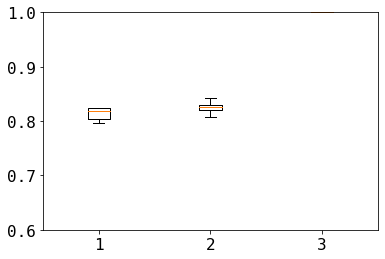

In [546]:
plt.boxplot([amis_aver, amis_HE, amis_cspa],
                showfliers=False,
                widths=0.2,labels = '');
plt.ylim([0.6, 1.0])

In [56]:
a = """
3 Results
As we mentioned earlier, the task of constructing a parcellation is vague, therefore we need to compare obtained parcellations in multiple ways. 
We start with analysing parcellation’s stability. All proposed methods are highly stable with respect to edge thresholding (network’s sparsity). Diagonal values of Figure 2 show average similarity between parcellations obtained using the same method but different network’s sparsity level, for anatomical parcellation it is equal to 1 (since they do not depend on network’s sparsity). All parcellations are also stable with respect to subject sampling: .83 (.3), .85 (.07), .71 (.08) average AMI for HE3, Aver3, CSPA3 respectively . Finally, uncertainty of HE  ensembling algorithm with respect to subject’s averaging order is negligible, the similarity between 100 different (order) ensembles is very high: .91 (.02) average AMI. Thus, we can conclude that all approaches are stable in all meaningful ways.
We proceed with measuring  how good is our averaging techniques.  Average similarity with subject parcellation is the highest for HE3however, Aver3is a close contestant (Table 1.). Next, we compare global network characteristics: how stable are Average Path length, Average Clustering coefficient and Degree distribution when we switch from subject parcellation to ensemble one. First of all, these characteristics should be of reasonable order, therefore we compute them for anatomical parcellations (Desikan, Destrieux). Secondly, we compare characteristics derived from network obtained using individual parcellation and network obtained using ensemble parcellation. As we can see from Table 2 proposed parcellations demonstrate adequate values of Clustering Coefficient (high clustering) and Average Path length (short paths). Moreover, network obtained using ensemble parcellation preserve both CC and AVL at least to some extent: Table 2 demonstrates correlation between individual and ensemble networks. We believe that CSPA approach fails in most cases because it has a relatively small number of parcels compared to individual parcellations at every level. However HE and Aver show very good results. Finally, we compute how good is our method in capturing discriminating differences between men and women. Though the result of gender classification is not interesting by itself, we expect to have similar performance for our parcellations and anatomical ones. Surprisingly, even parcellation with small number of regions (CSPA2) is almost as good at this task as any other.
Next, we assess how good are our parcellations in approximating original ConCon. As we can see from Table 1 KL divergence is generally smaller for parcellations with more regions. However, our best parcellation HE3has almost 2 times less parcels then Destrieux and yet almost equal KL divergence. Same holds for HE2in comparison with Desikanparcellation.
This result means that the internal connectivity structure of the original ConCon is caught at least as good as with anatomical parcellations but with lesser parcels.
Finally, we analyse some natural parcellation properties. As we can see from Table 1, our parcellations (HE, Aver) demonstrate both high hemisphere symmetry and parcels continuity. This result is especially interesting since the approach has no specific spatial constraints and  graph clustering is computed on the whole network (without dividing it into left and right hemisphere). We also observe that resulting connectivity parcellations are highly similar to anatomical parcellations as shown in Figure 2. For example, similarity between HE3and Desikanis the same as similarity between Desikanand Destrieux. Some of the detected communities coincide with anatomical regions (<...>).

"""